# Обучение без учителя. Разделение смеси распределений. Кластеризация. Тематическое моделирование.

#### Михаил Козак, Павел Мехнин, Данил Шкурат

## Обучение без учителя

**Обучение без учителя (Unsupervised learning)** – раздел машинного обучения, изучающий класс задач обработки данных, в которых известны только описания индивидов (признаки) из обучающей выборки, и требуется обнаружить закономерности, существующие между индивидами. В отличие от обучения с учителем, правильные "ответы" или "метки" для индивидов не известны.


Задачи обучения без учителя можно разделить на следующие типы:

* **Кластеризация** – разбиение выборки на непересекающиеся подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих индивидов, а индивиды разных кластеров существенно отличались.


* **Поиск ассоциативных правил** – нахождение таких наборов признаков, и таких значений этих признаков, которые особенно часто (неслучайно часто) встречаются у индивидов.


* **Заполнение пропущенных значений** – Значения некоторых признаков для некоторых индивидов могут отсутствовать. Однако, некоторые методы обработки данных требуют на вход данные без пропусков. Для заполнения отсутствующих значений часто применяют следующий подход:
    * Считая данный признак целевым, строят алгоритм, прогнозирующий его значение в зависимости от других признаков. Пропущенные значения заполняют прогнозами. 
    * Эта операция проделывается со всеми признаками, имеющими пропущенные значения.
    
    
* **Сокращение размерности** – Исходная информация представляется в виде признаковых описаний, причём число признаков может быть достаточно большим. Задача состоит в том, чтобы представить эти данные в пространстве меньшей размерности, по возможности, минимизировав потери информации.


* **Визуализация данных** – Некоторые методы кластеризации и снижения размерности строят представления выборки в пространстве размерности два.  Это позволяет отображать многомерные данные в виде плоских графиков и анализировать их визуально, что способствует лучшему пониманию данных и самой сути решаемой задачи.
 


##  Постановка задачи кластеризации
**Дано:**

Пусть имеется пространство объектов: $\pmb{X} \in \mathbb{R}^{n \times p} $, $n$ – число индивидов, $p$ – число признаков.
    
Некоторый конечный набор $\pmb{X}^m = \{\pmb{x}_1, \dots, \pmb{x}_m\}$, где $\pmb{x}_i$ – $i$-й индивид.
    
$\rho: \mathbb{R}^p \times \mathbb{R}^p \to [0, \infty)$ – функция расстояния между объектами.


**Найти:**

Необходимо найти множество кластеров $Y \in \mathbb{R}^k$ и алгоритм кластеризации $a: X \rightarrow Y$ такие, что:
- каждый кластер состоит из близких объектов (относительно $\rho$);
- объекты разных кластеров различались существенно.

## Некорректность

Решение задачи кластеризации принципиально неоднозначно:
- точной постановки задачи кластеризации нет;
- существует много критериев качества кластеризации;
- существует много эвристических методов кластеризации;
- число кластеров, как правило, не известно заранее;
- результат кластеризации сильно зависит от метрики $\rho$, выбор которой также не однозначен.

## Цели кластеризации
- Упростить дальнейшую обработку данных
- Сократить объём хранимых данных
- Поиск выбросов
- Построить иерархию множества объектов

## Функционалы качества кластеризации

**Возможна постановка задачи кластеризации:** приписать номера кластеров объектам так, чтобы значение выбранного функционала качества приняло наилучшее значение.

### Среднее внутрикластерное расстояние
$$F_0 = \frac{\sum_{i < j}\mathbf{I}_{\{y_i = y_j\}}\rho(\pmb x_i, \pmb x_j)}{\sum_{i < j}\mathbf{I}_{\{y_i = y_j\}}},$$ 

Решая задачу кластеризации, мы хотим по возможности получать как можно более кучные кластеры, то есть минимизировать $F_0$.

### Среднее межкластерное расстояние

$$F_1 = \frac{\sum_{i < j}\mathbf{I}_{\{y_i \neq y_j\}}\rho(\pmb x_i, \pmb x_j)}{\sum_{i < j}\mathbf{I}_{\{y_i \neq y_j\}}}.$$

Среднее межкластерное расстояние, напротив, нужно максимизировать, то есть имеет смысл выделять в разные кластеры наиболее удалённые друг от друга объекты.

Имеет смысл вычислять отношение пары функционалов, чтобы учесть как внутрикластерные, так и межкластерные расстояния: $F_0/F_1 \rightarrow min$.

### Коэффициент силуэта

Коэфициент силуэта является мерой того, насколько похож объект на другие объекты из своего кластера в сравнении с объектами из других кластеров.

Введем вспомогательные величины:
- Cреднее расстояние между $\pmb x_i$ и объектами того же кластера $$ c(\pmb x_i) = \frac{1}{|K_i| - 1}\sum\limits_{\pmb x_j \in K_i,\, i\neq j}\rho(\pmb x_i, \pmb x_j) $$ 
- Cреднее расстояние между $\pmb x_i$ и объектами следующего ближайшего кластера. $$ b(\pmb x_i) = \min\limits_{i\neq j}\frac{1}{|K_j|}\sum\limits_{\pmb x_z \in K_j}\rho(\pmb x_i, \pmb x_z) $$ 

Коэффициент определяется для каждого объекта выборки, а метрика для результатов кластеризации всей выборки вводится как средний коэффициент силуэта для всех объектов выборки.
- Cилуэт объекта: $$ s(\pmb x_i) = \begin{cases} \frac{b(\pmb x_i) - c(\pmb x_i)}{\max\{c(\pmb x_i), b(\pmb x_i)\}}, & |K_i| > 1\\ 0, & |K_i| = 1 \end{cases} $$ 
- Cилуэт кластеризации: $S =\frac{1}{n}\sum\limits_{i}s(\pmb x_i)$. 

Данный функционал качества максимизируется. Он близок к единице, когда кластеры представляют собой далеко отстоящие компактные скопления объектов.

### Индекс Дэвиса-Болдина, DBI

Является средним отношением внутрикластерных разбросов к расстояниям между кластерами. 

Предположим, имеется разбиение данных на $K$ кластеров, и в нем каждый кластер $C_i$ имеет размер $|C_i| = T_i$ и центроид $A_i$. Пусть объекты $X_j$ принадлежат кластеру $C_i$. 

Мерой компактности кластера $C_i$ назовем величину $$S_ {i} = \left({\dfrac{1}{T_{i}}}\sum_{j=1}^{T_{i}}{\left|X_{j}-A_{i}\right|^{p}}\right)^{1/p},$$ т.е. среднее расстояние от объектов кластера до их центроидов. Обычно $p = 2$ (эвклидово расстояние).

Мерой отделимости кластеров $C_i$ и $C_j$ назовем величину
$$M _ {{i, j}} = \left | \left | A_ {i} -A_ {j} \right | \right |_ {p} = { \Bigl (} \sum_{{k = 1 }} ^ {{n}} \left | a_{{k, i}} - a_{{k, j}} \right | ^ {p} { \Bigr)} ^ {{{ \frac 1p}}},$$ т.е. расстояние между центроидами.

Введём величину $R_{{i, j}} = \frac{S_{i} + S_{j}}{M_{{i, j}}}$ и найдём $D_{i} = \max_{j \neq i} R_{i, j}$, тогда $$DBI = \frac{1}{N} \sum_{i=1}^{N}D_{i}.$$

Наилучшее разбиение на кластеры минимизирует DBI.

## Разделение смеси распределений

Один из подходов к кластеризации – **model-based**. 


В данном подходе предполагается, что выборка $\pmb{X}^m$ – случайна, независима и взята из смеси распределений, плотность которой в точке $\pmb{x} \in \pmb{X}^m$ представима в следующем виде:

$p(\pmb{x}) = \sum_\limits{j = 1}^k w_j p_j(\pmb{x}; \pmb{\theta}_j),$ при этом $\sum_\limits{j = 1}^k w_j = 1$, $w_j \geq 0$ – априорные вероятности кластеров.

$p_j(\pmb{x}; \pmb{\theta}_j)$ – плотность распределения $j$-го кластера с параметрами $\pmb{\theta}_j$.

Предполагается, зная число кластеров $k$ и вид плотностей $p_j$, оценить параметры $w_j, \pmb{\theta}_j$, максимизируя логарифм функции правдоподобия

$$ \ln \mathcal{L}(\{\pmb{x}_i\}; \{w_j\}; \{\pmb{\theta}_j\}) = \sum_{i=1}^m \ln \sum_{j=1}^k w_j p_j(\pmb{x}_i; \pmb{\theta}_j) \rightarrow \max_{\{w_j\}, \{\pmb{\theta}_j\}}.$$

Для решения данной задачи применяется ЕМ-алгоритм.

## EM-алгоритм

EM-алгоритм состоит из двух шагов: **E**xpectation, **M**aximization.

### Expectation

Пусть $p_j(\pmb{x}; \pmb{\theta}_j)$ – плотность вероятности того, что объект $\pmb{x}$ получен из $j$-й компоненты смеси. По формуле условной вероятности имеем:

$$ p(\pmb{x}; \pmb{\theta}_j) = p(\pmb{x}) P(\pmb{\theta}_j | \pmb{x}) = w_j p_j(\pmb{x}; \pmb{\theta}_j).$$

Обозначим $g_{ij} = P(\pmb{\theta}_j | \pmb{x})$. По формуле Байеса:

$$g_{ij} = \frac{w_j p_j(\pmb{x}_i; \pmb{\theta}_j)}{\sum_{s=1}^k w_{s} p_{s}(\pmb{x}_i; \pmb{\theta}_s) }.$$

### Maximization

Максимизируем:

$$ \ln \mathcal{L}(\{\pmb{x}_i\}; \{w_j\}; \{\pmb{\theta}_j\}) = \sum_{i=1}^m \ln \sum_{j=1}^k w_j p_j(\pmb{x}_i; \pmb{\theta}_j) \rightarrow \max_{\{w_j\}, \{\pmb{\theta}_j\}}.$$

Функция Лагранжа:

$$L(\{\pmb{x}_i\}; \{w_j\}; \{\pmb{\theta}_j\}) = \sum_{i=1}^m \ln \sum_{j=1}^k w_j p_j(\pmb{x}_i; \pmb{\theta}_j) -\lambda(\sum_{j=1}^k w_j - 1). $$

Из равенства нулю производной по $w_j$ следует:

$$w_j = \frac{1}{m} \sum_{i=1}^m g_{ij}, \quad j=1, \dots, k.$$

Из равенства нулю производной по $\pmb{\theta}_j$ следует:

$$\pmb{\theta}_j = \arg \max_{\pmb{\theta}} \sum_{i=1}^m g_{ij} \ln p(\pmb{x_i}; \pmb{\theta}), \quad j=1, \dots, k.$$

### Случай нормальных плотностей

Предположим, что компоненты смеси имеют нормальные распределения со средними $\mu_j$ и матрицами ковариаций $\Sigma_j$, тогда имеем следующие оценки параметров:

$$\mu_j = \frac{1}{mw_j} \sum_{i=1}^m g_{ij} \pmb{x_i},$$
$$\Sigma_j = \frac{1}{mw_j} \sum_{i=1}^m g_{ij} (\pmb{x_i} - \mu_j) (\pmb{x_i} - \mu_j)^{\mathrm{T}}.$$
    

### EM-алгоритм кратко

* Вычислить начальное приближение $w_y, \theta_y$
* **Повторять**
    * E-шаг: $g_{ij}^0 = g_{ij};$ $g_{ij} = \frac{w_j p_j(\pmb{x}_i; \pmb{\theta}_j)}{\sum_{s=1}^k w_{s} p_{s}(\pmb{x}_i; \pmb{\theta}_s) }.$
    * M-шаг: $$\theta_j = \arg \max_{\pmb{\theta}} \sum_{i=1}^m g_{ij} \ln p(\pmb{x}_i; \pmb{\theta}); \quad w_j = \frac{1}{m} \sum_{i=1}^m g_{ij}.$$
* **Пока** $\max_{i,j} |g_{ij} - g_{ij}^0| > \delta$.

</br></br>

**Достоинства**:

* Для этого алгоритма есть чётко поставленная задача
* Нет необходимости масштабировать признаки.

**Недостатки**:

* Алгоритм неустойчив по начальным данным (то есть тем, которые инициализируют векторы параметров $\pmb{w}$ и $\pmb{theta}$ на первой итерации)
* Не позволяет автоматически определять количество $k$ компонент смеси.

## Примеры

### Используемые библиотеки и функции

В рамках примеров рассматривается библиотека [sklearn](https://scikit-learn.org/stable/), EM-алгоритм: GaussianMixture().


In [1]:
from sklearn.mixture import GaussianMixture

**Параметры**

* ```n_components: int, default=1```

    Число компонент смеси (число $k$).
    
    
* ```covariance_type: {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’```

    Тип ковариационной матрицы. По умолчанию ```'full'``` – каждая компонента обладает своей ковариационной матрицей.
    
    
* ```tol: float, default=1e-3```
    
    Порог (tolerance).
    
    
* ```reg_covar: float, default=1e-6```

    Неотрицательная регуляризация, позволяет убедиться, что все ковариационные матрицы положительны. По умолчанию $1e-6$.
    
    
* ```max_iter: int, default=100```

    Количество итераций EM-алгоритма.


* ```n_init: int, default=1```
    
    Количество инициализаций для алгоритма. Лучшие результаты сохраняются. 
    
    
* ```init_params: {‘kmeans’, ‘k-means++’, ‘random’, ‘random_from_data’}, default=’kmeans’```

    Метод, используемый для инициализации весов, средних значений и точности.
    

* ```weights_init: array-like of shape (n_components, ), default=None```

    Веса, заданные пользователем. В случае их отсутствия они инициализируются, используя метод из ```init_params```.
    
    
* ```means_init: array-like of shape (n_components, n_features), default=None```
    
    Средние значения, заданные пользователем. В случае их отсутствия они инициализируются, используя метод из ```init_params```.
    
    
* ```precisions_init: array-like, default=None```

    Начальные точности, заданные пользователем (обратные матрицы ковариации). В случае их отсутствия они инициализируются, используя метод из ```init_params```.
    
    
* ```random_state: int, RandomState instance or None, default=None```

    Случайное зерно.
    
    
* ```warm_start: bool, default=False```

    В случае, если ```True```, в качестве инициализации для последующего обучения модели используется ранее полученный результат.
    

* ```verbose: int, default=0```

* ```verbose_interval: int, default=10```

### Модельный пример

Сперва рассмотрим модельный пример, параметры которого нам уже известны.

In [2]:
# Параметр для отображения графиков внутри ноутбука
%matplotlib inline

# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture


# Количество компонент в смеси распределений
k = 5
# Создадим нужное число нормальных распределений
X, Y = make_blobs(n_samples=1000, centers=k, cluster_std=3, random_state=42)
# Внесем шум в данные
X = np.dot(X, np.random.RandomState(42).randn(2,2))
# Построим сетку координат в пространстве
x, y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

# Построим EM-алгоритм
model = GaussianMixture(n_components=k, max_iter=1000).fit(X) 
means = model.means_ 
covariances = model.covariances_

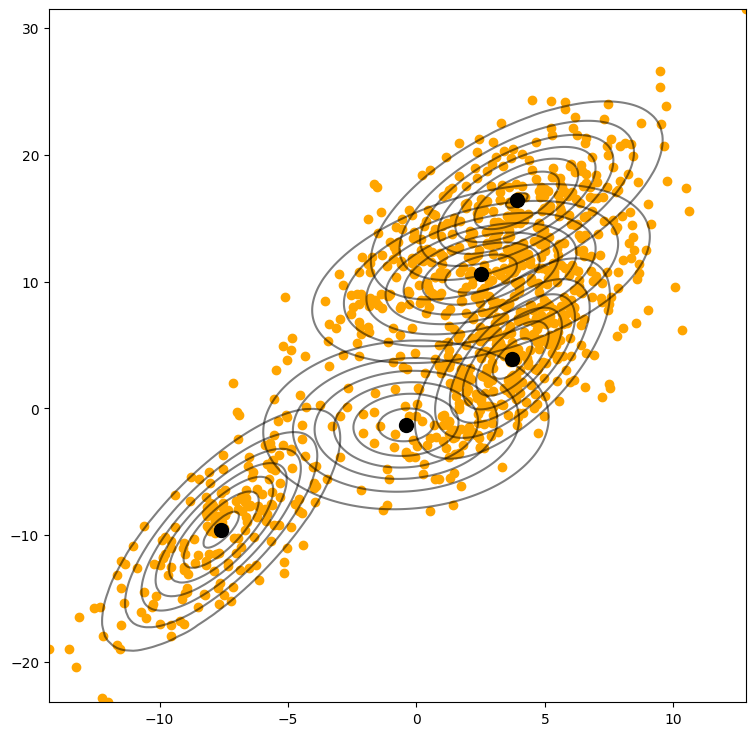

In [3]:
fig = plt.figure(figsize=(9, 9))
ax0 = fig.add_subplot()
ax0.scatter(X[:,0],X[:,1], color='orange')
for m, c in zip(means, covariances):
    multi_normal = multivariate_normal(mean=m, cov=c)
    ax0.contour(np.sort(X[:,0]), np.sort(X[:,1]), 
                multi_normal.pdf(XY).reshape(len(X),len(X)),
                colors='black', alpha=0.5)
    ax0.scatter(m[0], m[1], c='black', zorder=10, s=100)
    
plt.show()

**Предсказанные значения**

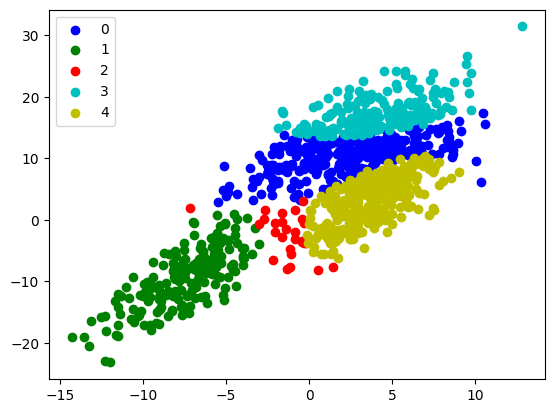

In [4]:
colors = [0, 1, 2, 3, 4]
ccolors = ['b', 'g', 'r', 'c' , 'y']
labels = model.predict(X)
import pandas as pd
X = pd.DataFrame(X)

X['color'] = labels.tolist()
for i in range(0 , len(colors)):
    data = X.loc[X['color'] == colors[i]]
    plt.scatter(data[0], data[1], c=ccolors[i], label=colors[i])
plt.legend()
plt.show()

**Действительные значения**

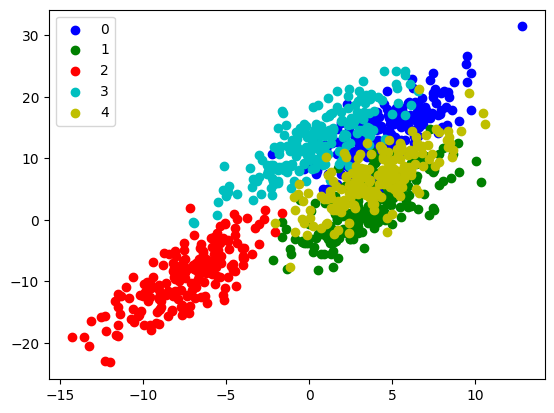

In [5]:
X['color'] = Y
for i in range(0 , len(colors)):
    data = X.loc[X['color'] == colors[i]]
    plt.scatter(data[0], data[1], c=ccolors[i], label=colors[i])
plt.legend()
plt.show()

### Реальные данные

In [6]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import matplotlib.cm as cm

In [7]:
# загрузка данных
df0 = pd.read_table('seeds_dataset.txt', delim_whitespace=True, skiprows=None, index_col=None, header='infer')
df = df0.copy()
df.drop("Variety_of_wheat", axis = 1, inplace = True)
df.head()

Area  Perimeter  Compactness  Length_of_kernel  Width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Assymetry_coefficient  Length_of_kernel_groove  
0                  2.221                    5.220  
1                  1.018                    4.956  
2                  2.699                    4.825  
3                  2.259                    4.805  
4                  1.355                    5.175

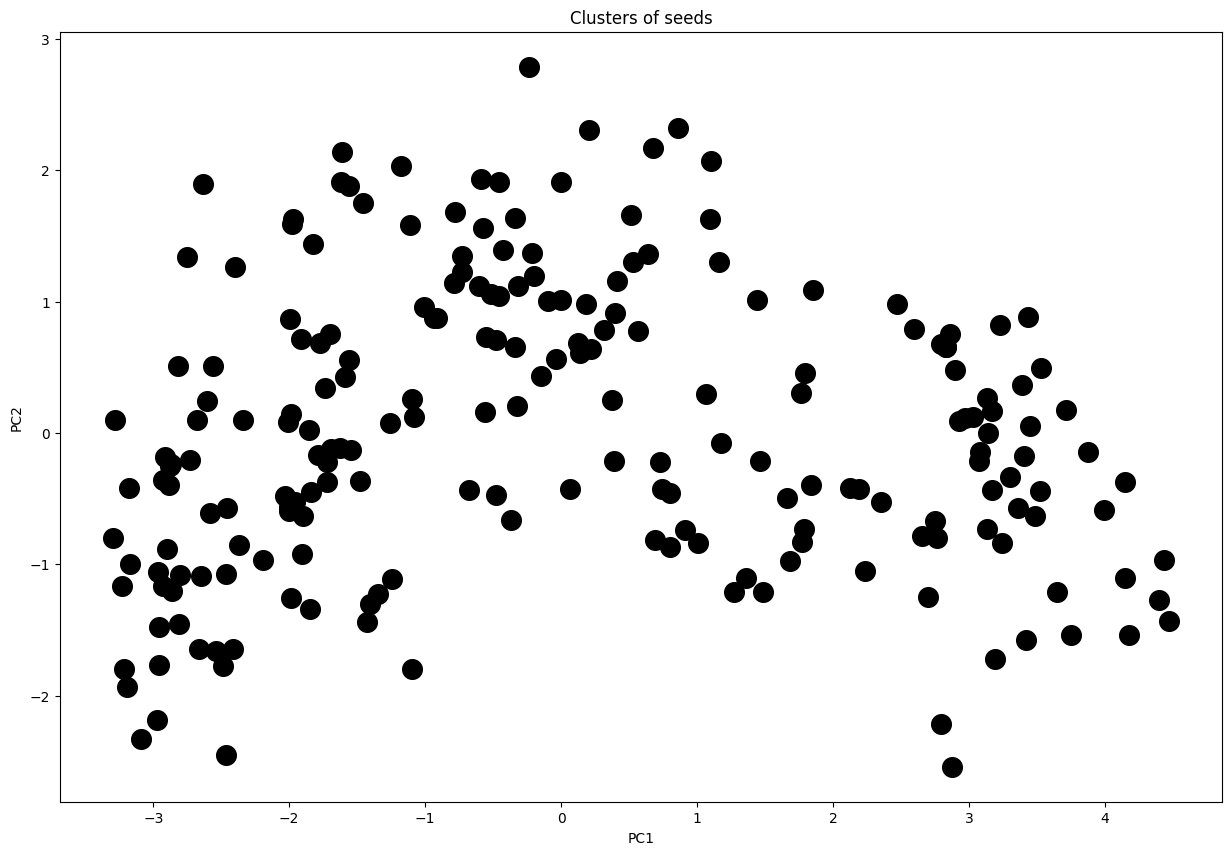

In [8]:
pca = decomposition.PCA(n_components=2)
df = StandardScaler().fit_transform(df)
pc = pca.fit_transform(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[:, 0], pc[:, 1], s = 200, c = "black")
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

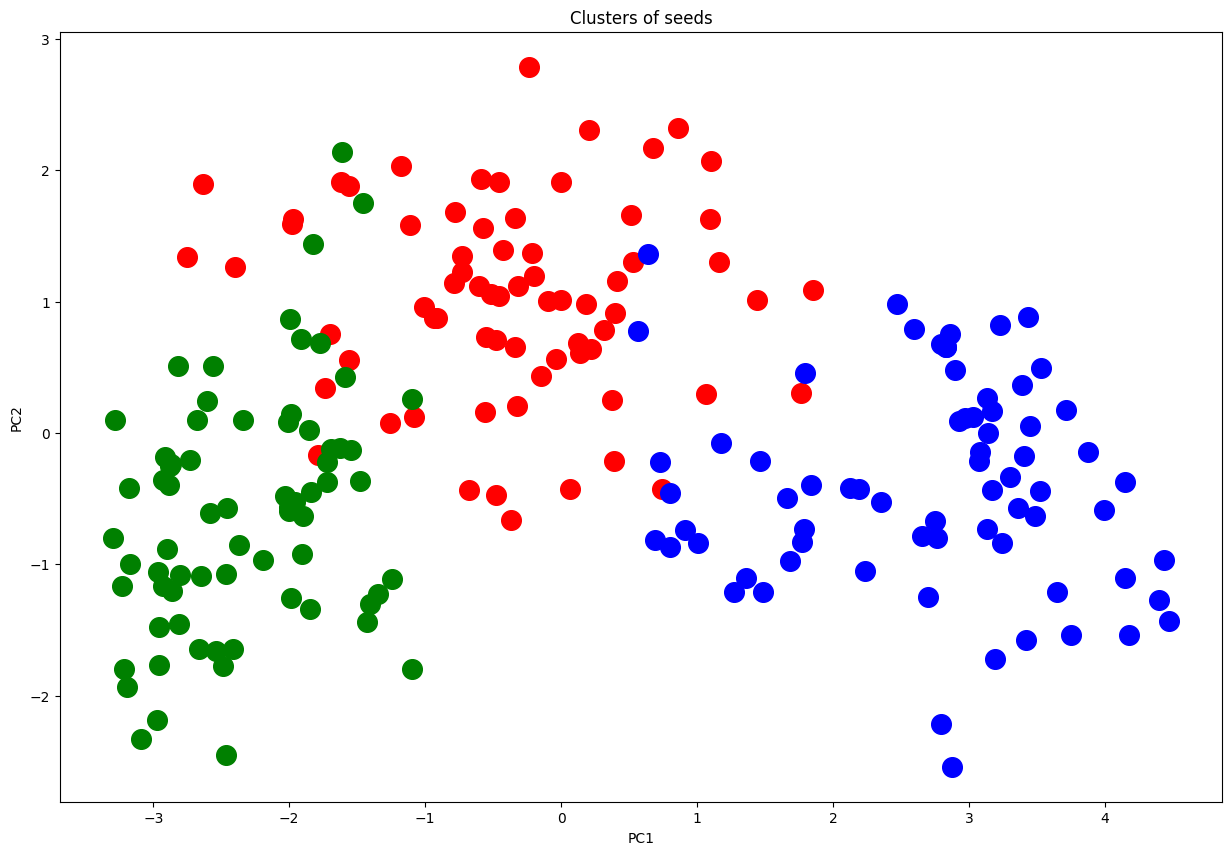

In [9]:
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[df0.Variety_of_wheat == 1, 0], pc[df0.Variety_of_wheat== 1, 1], s = 200, c = 'red')
plt.scatter(pc[df0.Variety_of_wheat == 2, 0], pc[df0.Variety_of_wheat == 2, 1], s = 200, c = 'blue')
plt.scatter(pc[df0.Variety_of_wheat == 3, 0], pc[df0.Variety_of_wheat == 3, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

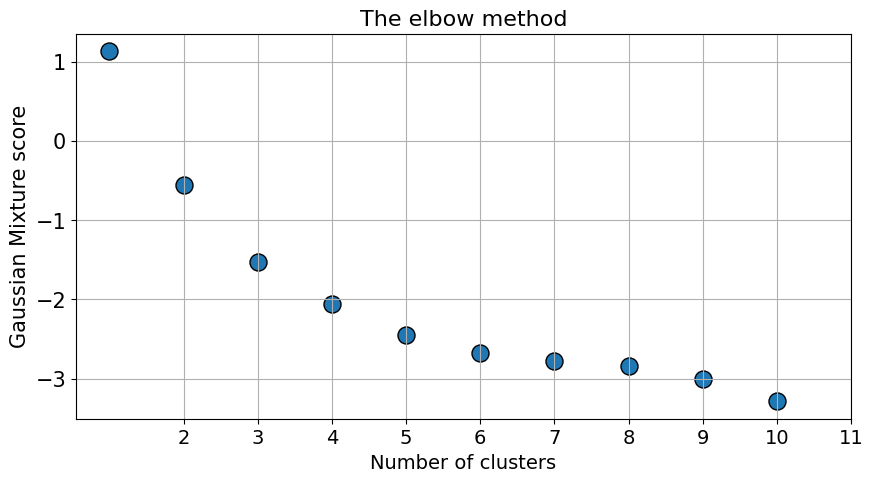

In [10]:
gm_scores = []
for i in range(1,11):
    gm = GaussianMixture(n_components=i, random_state=0).fit(df) 
    preds = gm.predict(df)
    gm_scores.append(-gm.score(df))
plt.figure(figsize=(10,5))
plt.title("The elbow method",fontsize=16)
plt.scatter(x=[i for i in range(1,11)],y=gm_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Gaussian Mixture score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()    

Посчитаем значения BIC/AIC для всех вариантов ковариационных матриц.

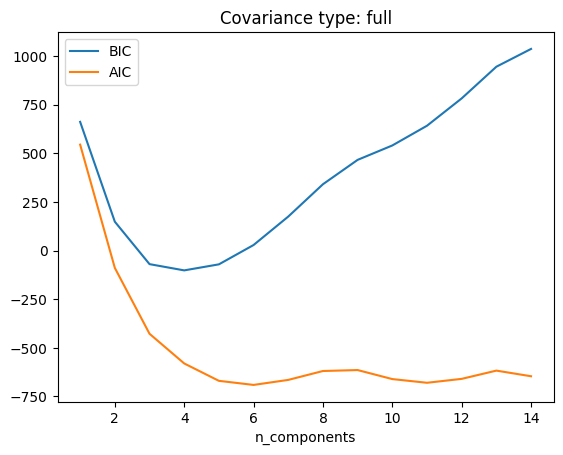

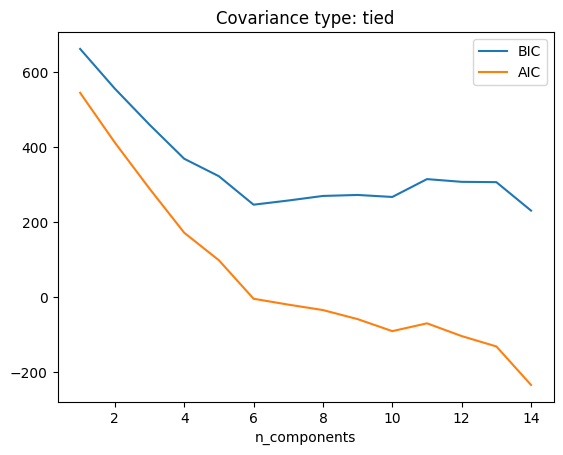

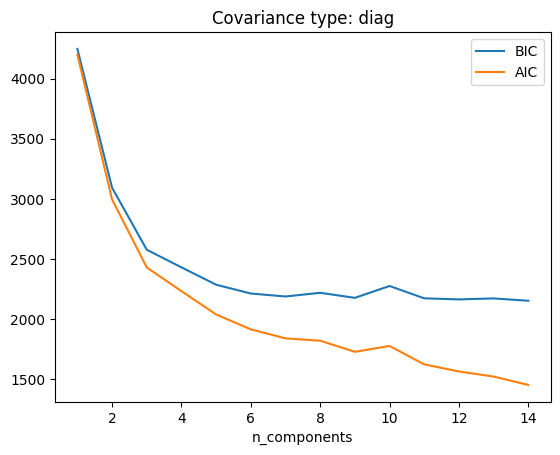

In [11]:
n_components = np.arange(1, 15)

for cov_type in ['full', 'tied', 'diag']:
    
    models = [GaussianMixture(n, random_state=0, covariance_type = cov_type).fit(df) for n in n_components]

    plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.title(f"Covariance type: {cov_type}")
    plt.show()

For n_clusters = 3 The average silhouette_score is : 0.363
For n_clusters = 4 The average silhouette_score is : 0.271
For n_clusters = 5 The average silhouette_score is : 0.216


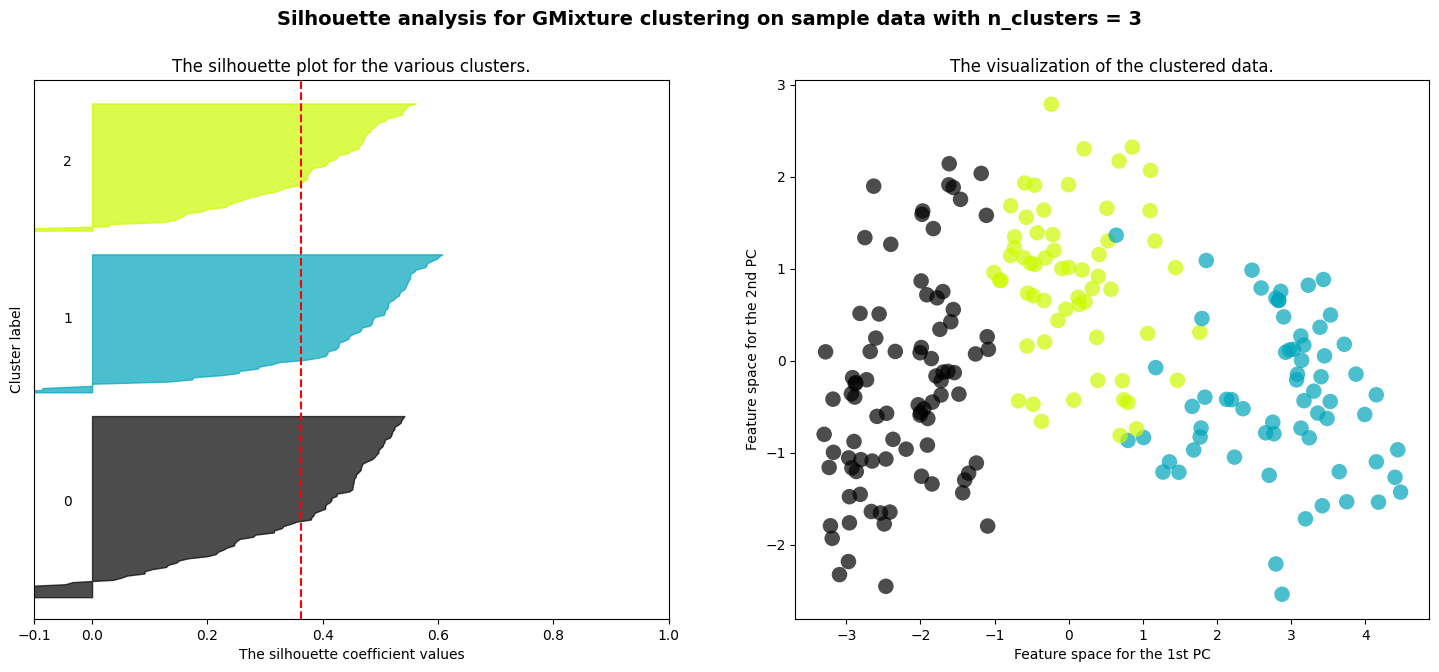

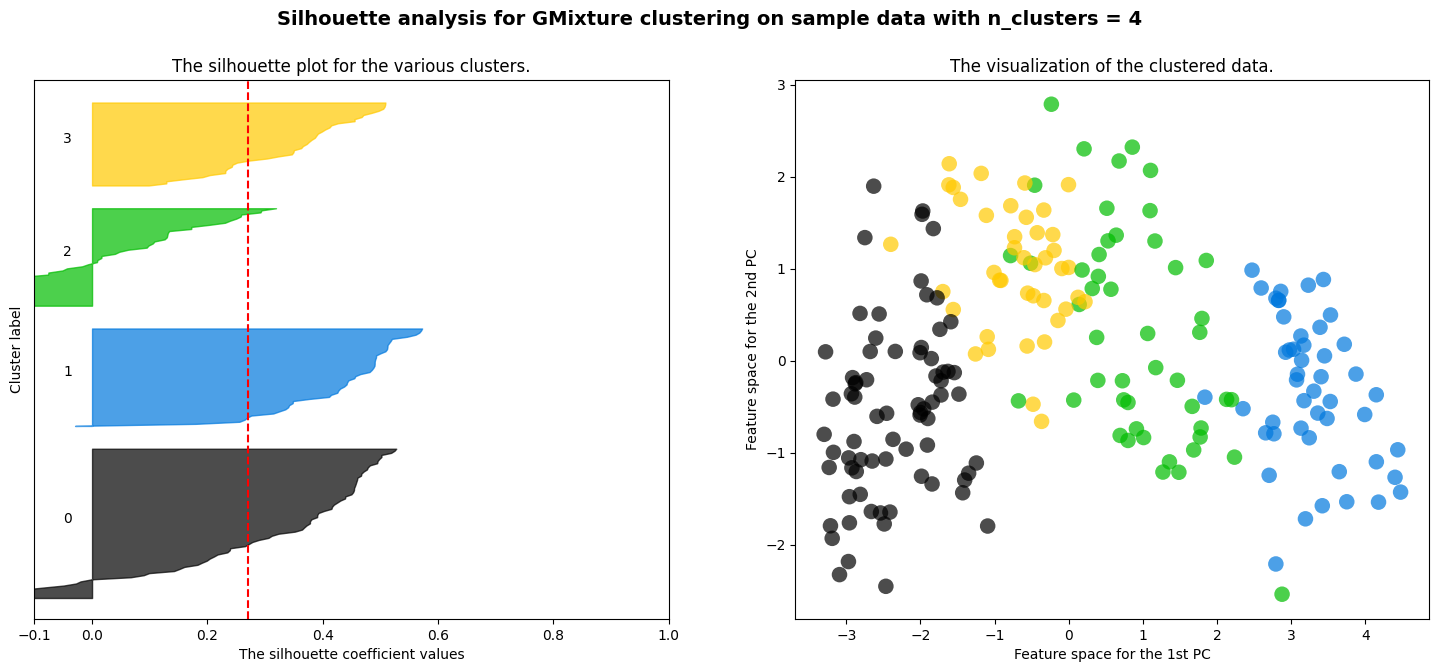

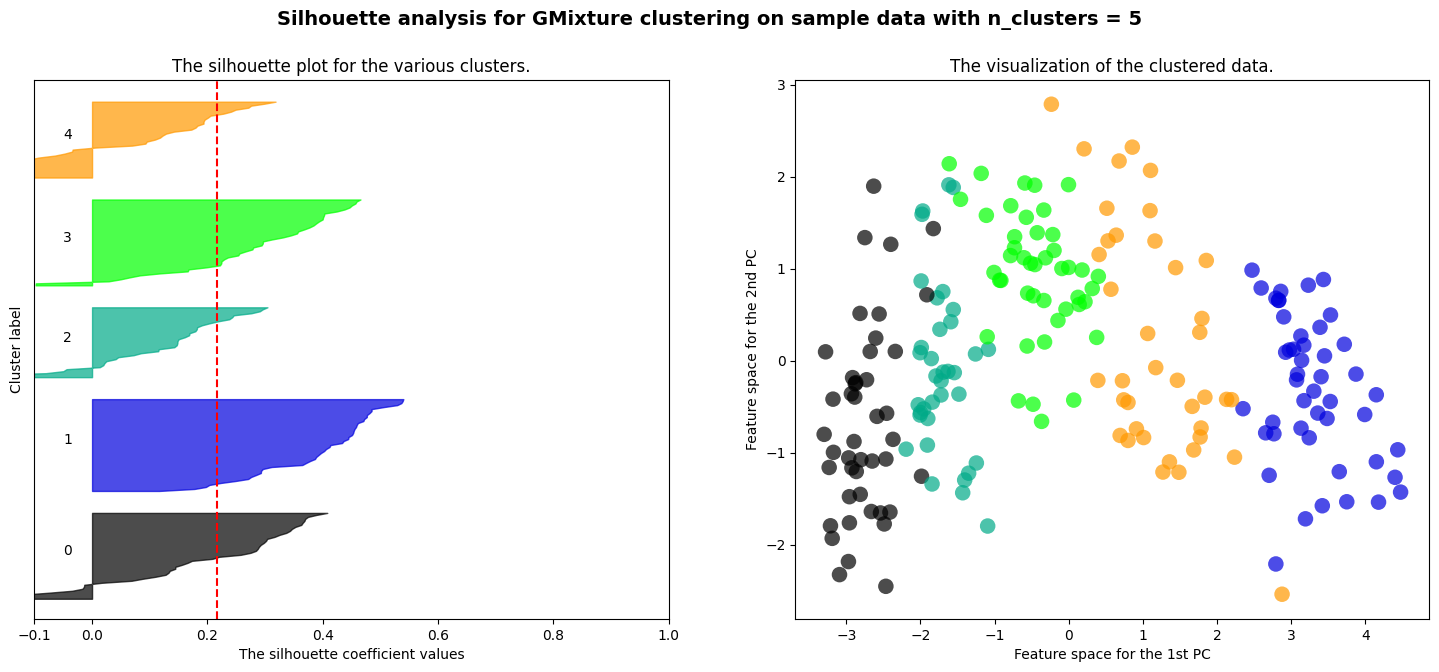

In [12]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
X, y = df, df0.Variety_of_wheat
range_n_clusters = [3, 4, 5]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = GaussianMixture(n_components=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is : %0.3f"
        % silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pc[:, 0], pc[:, 1], marker=".", s=500, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st PC")
    ax2.set_ylabel("Feature space for the 2nd PC")
    plt.suptitle(
        "Silhouette analysis for GMixture clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.379
For n_clusters = 4 The average silhouette_score is : 0.306
For n_clusters = 5 The average silhouette_score is : 0.234


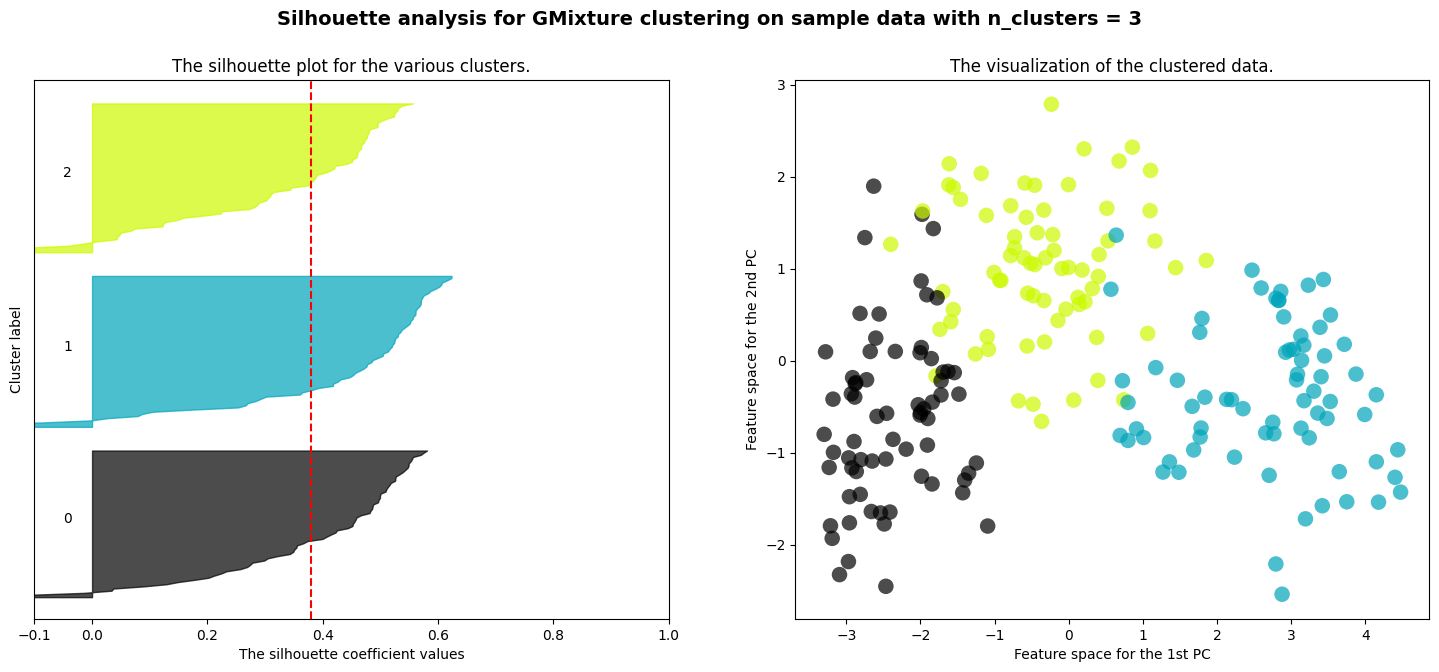

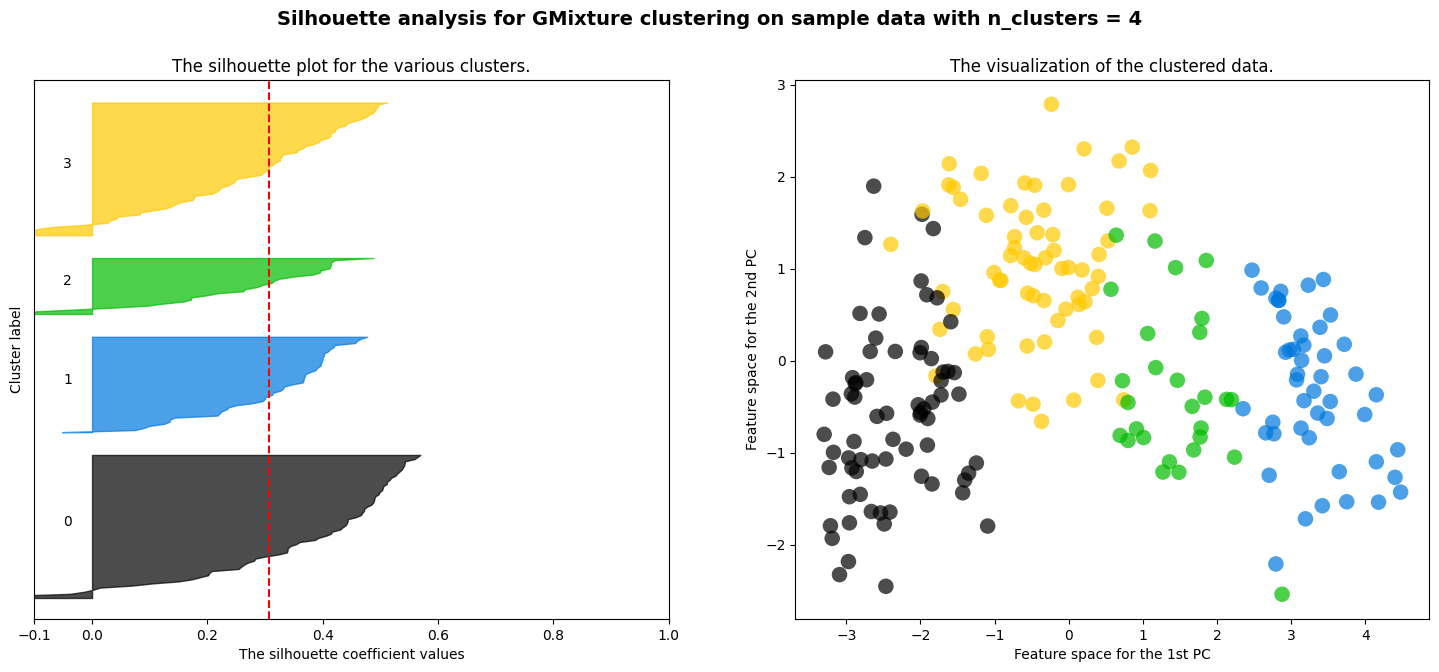

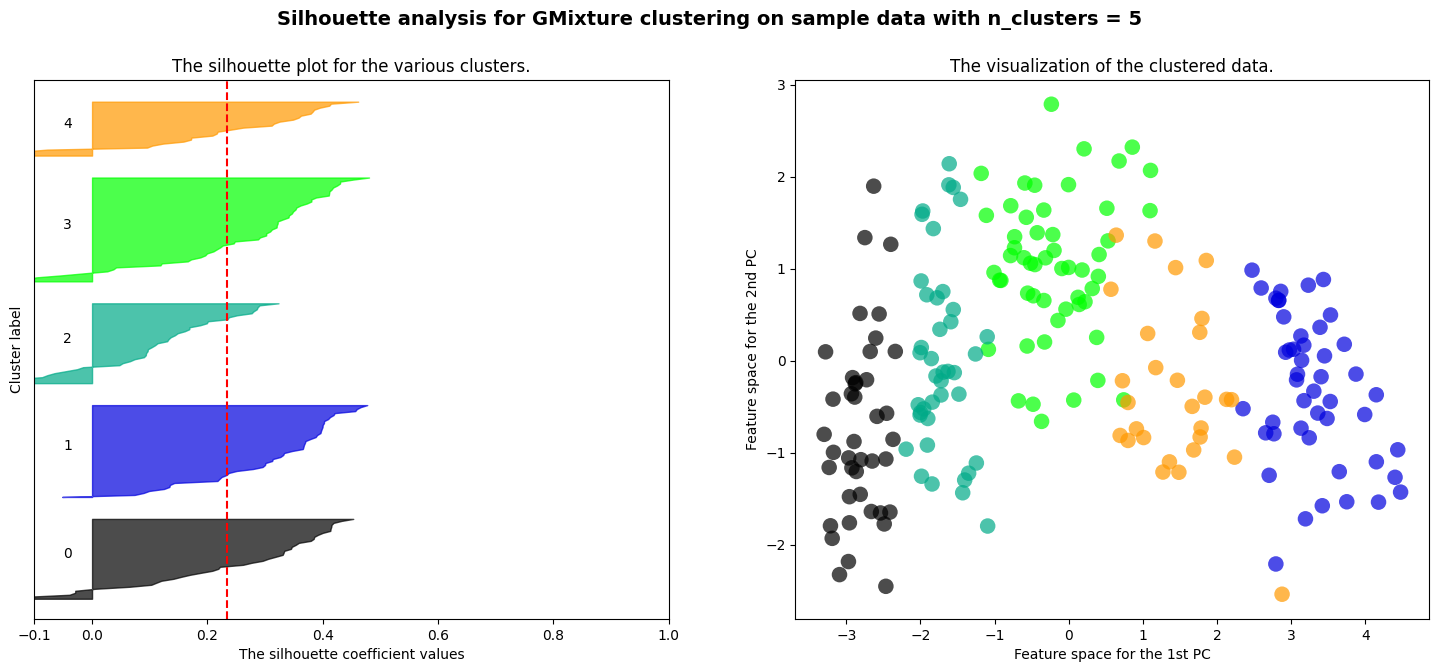

In [13]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
X, y = df, df0.Variety_of_wheat
range_n_clusters = [3, 4, 5]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type="tied", random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is : %0.3f"
        % silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pc[:, 0], pc[:, 1], marker=".", s=500, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st PC")
    ax2.set_ylabel("Feature space for the 2nd PC")
    plt.suptitle(
        "Silhouette analysis for GMixture clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

In [14]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
X, y = df, df0.Variety_of_wheat
range_n_clusters = [3, 4, 5]
for cov_type in ['full', 'tied', 'diag']:
    print(f"Covariance type: {cov_type}")
    for n_clusters in range_n_clusters:
        clusterer = GaussianMixture(n_components=n_clusters, covariance_type=cov_type, random_state=0)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is : %0.3f"
            % silhouette_avg,
        )

Covariance type: full
For n_clusters = 3 The average silhouette_score is : 0.363
For n_clusters = 4 The average silhouette_score is : 0.271
For n_clusters = 5 The average silhouette_score is : 0.216
Covariance type: tied
For n_clusters = 3 The average silhouette_score is : 0.379
For n_clusters = 4 The average silhouette_score is : 0.306
For n_clusters = 5 The average silhouette_score is : 0.234
Covariance type: diag
For n_clusters = 3 The average silhouette_score is : 0.372
For n_clusters = 4 The average silhouette_score is : 0.293
For n_clusters = 5 The average silhouette_score is : 0.237


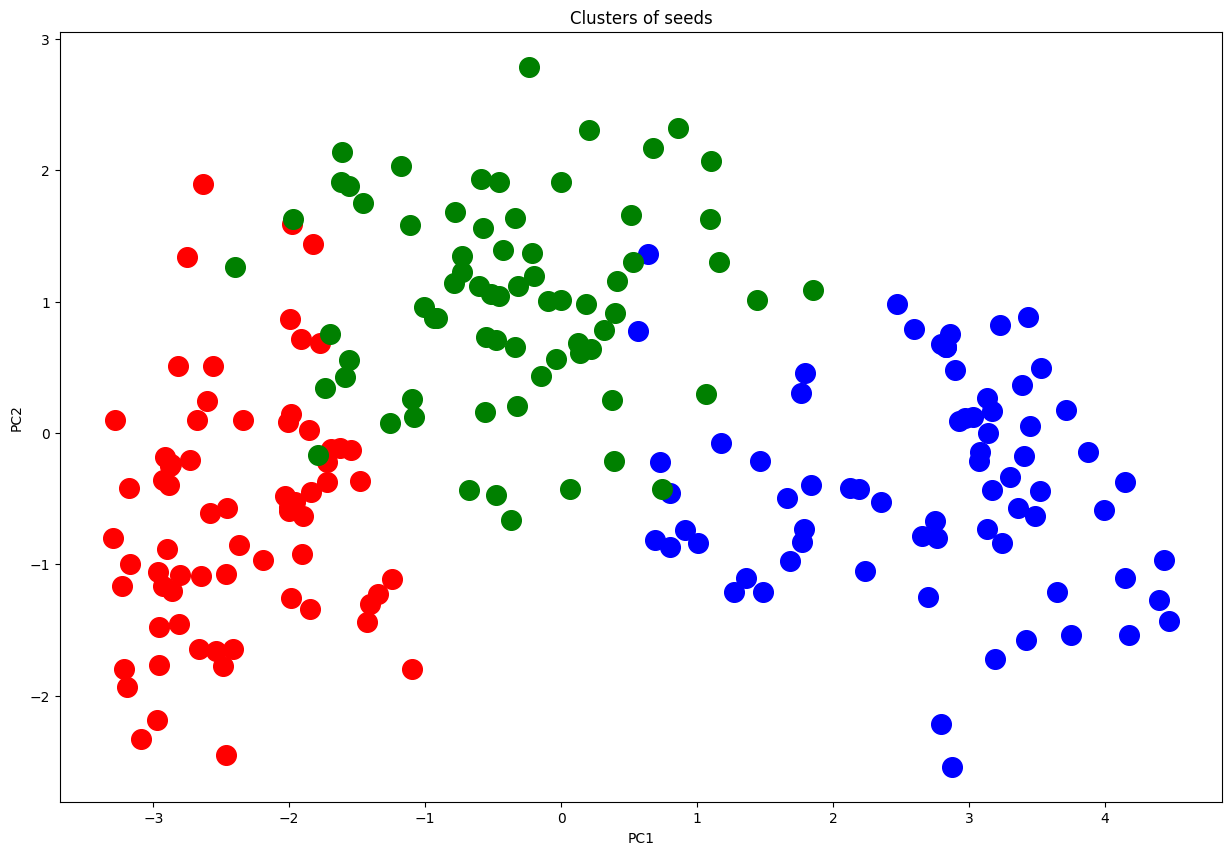

{True: 202, False: 8}

In [15]:
gmixture = GaussianMixture(n_components=3, covariance_type="tied", random_state=0).fit(df)
y_pred = gmixture.fit_predict(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[y_pred == 0, 0], pc[y_pred == 0, 1], s = 200, c = 'red')
plt.scatter(pc[y_pred == 1, 0], pc[y_pred == 1, 1], s = 200, c = 'blue')
plt.scatter(pc[y_pred == 2, 0], pc[y_pred == 2, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
y_pred[y_pred == 0] = 3
y_pred[y_pred == 1] = 4
y_pred[y_pred == 2] = 1
y_pred[y_pred == 4] = 2
dict(Counter(y_pred == df0.Variety_of_wheat))

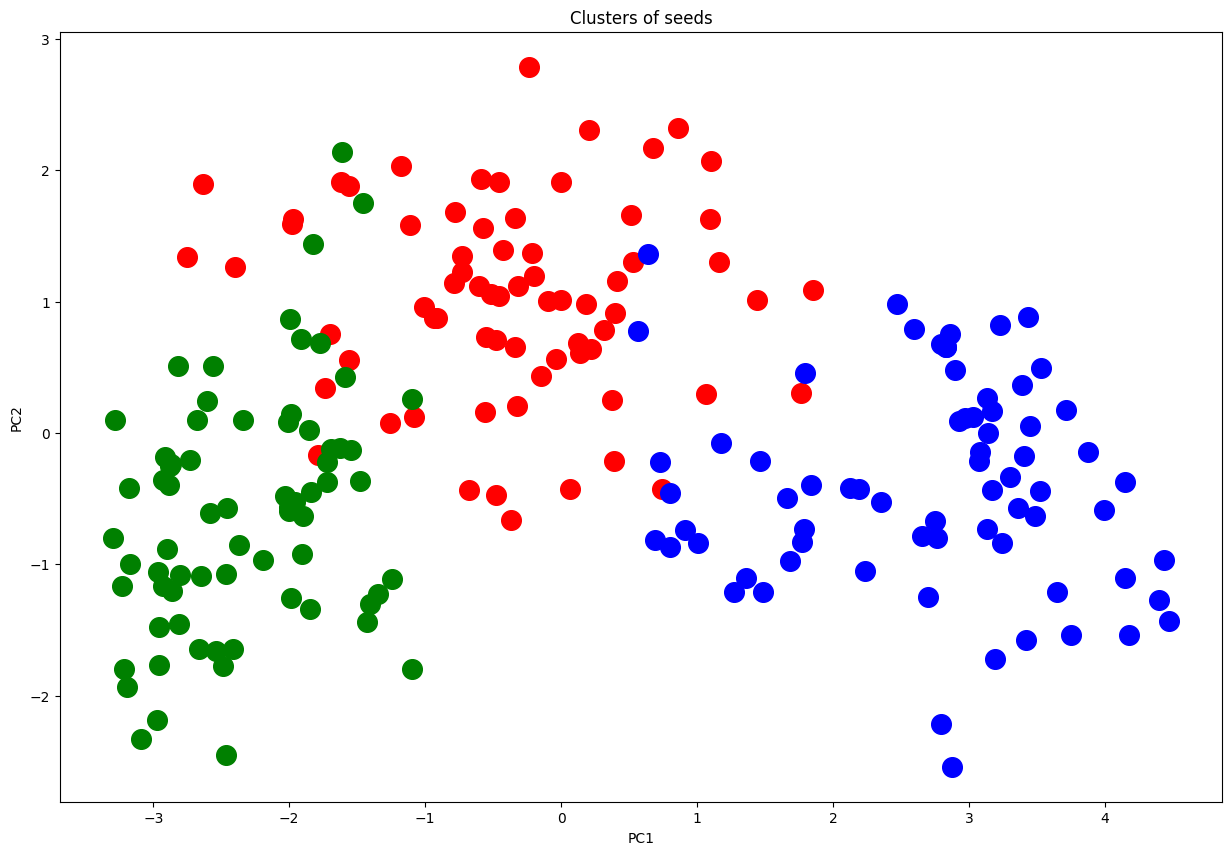

In [16]:
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[df0.Variety_of_wheat == 1, 0], pc[df0.Variety_of_wheat== 1, 1], s = 200, c = 'red')
plt.scatter(pc[df0.Variety_of_wheat == 2, 0], pc[df0.Variety_of_wheat == 2, 1], s = 200, c = 'blue')
plt.scatter(pc[df0.Variety_of_wheat == 3, 0], pc[df0.Variety_of_wheat == 3, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Алгоритм k-средних (k-means)

Метод k-means осуществляет декомпозицию набора данных, состоящего из $n$ наблюдений, на $k$ кластеров с заранее неизвестными параметрами. При этом выполняется поиск центроидов - максимально удаленных друг от друга центров сгущений точек $C_k$ с минимальным разбросом внутри каждого кластера. 

В качестве меры близости выбрано евклидово расстояние: $$ d(\pmb x_{i}, \pmb x_{i'}) = \sum\limits_{j=1}^p (x_{ij} - x_{i'j})^{2} = \| \pmb x_{i} - \pmb x_{i'} \|^{2}. $$

Основная идея алгоритма заключается в минимизации меры близости между индивидами внутри одного кластера: $$ \underset{C_{1},\ldots, C_{k}}\min \left\{ \sum\limits_{l=1}^k \frac{1}{|C_{l}|} \sum\limits_{i,i' \in C_{l}} \| \pmb x_{i} - \pmb x_{i'} \|^{2} \right\}. $$

## Алгоритм k-means

1. Выбираем начальное приближение центров кластеров $\pmb \mu_{1},\ldots, \pmb \mu_{k}$ случайным образом; 
2. Соотносим каждый объект к ближайшему центру (аналог E-шага) $$C(i) = \underset{0 \leq j \leq k}{\text{argmin}} \|\pmb x_{i} - \pmb \mu_{j} \|^{2};$$
3. Для каждого кластера $C_{j}$ пересчитываем центры $\pmb \mu_{j}$ как выборочное среднее индивидов, которые были отнесены к этому кластеру (аналог M-шага);
4. Повторяем шаги 2 и 3 пока принадлежность кластерам не перестанет изменяться.

## Сложность и возможные оптимизации

Средняя сложность определяется как $O(k n T)$, где $k$ — количество кластеров, $n$ — количество индивидов, а $T$ — количество итераций до сходимости.

Сложность в наихудшем случае определяется как $O(n^{k+2/p})$, где $n$ — количество индивидов, $p$ — количество признаков.

На практике алгоритм $k$-средних очень быстр (один из самых быстрых доступных алгоритмов кластеризации), но он попадает в локальные минимумы. Вот почему может быть полезно перезапустить его несколько раз.

При больших $n$ целесообразно использовать модификацию MiniBatchKMean, который выполняет обновления позиций центров с помощью мини-пакетов вместо всей выборки.

При  больших $p$ целесообразно уменьшить размерность простанства признаков с помощью АГК.

## k-means и его связь с EM - алгоритмом

Алгоритм k-средних является частным случаем для гауссовой смеси распределения с диагональными ковариационными матрицами, у которых одинаковые значения на диагоналях.

В таком случае:
- На Е-шаге мы не считаем вероятности $g_{ij}$ принадлежности $i$-го объекта $j$-ому кластеру, а приписываем каждый объект одному кластеру (вероятность принадлежности будет равна 0 или 1);
- Форма кластеров не настраивается: они все являются сферическими.

## Достоинства: 
- Алгоритм очень гибкий 
- Простой 
## Недостатки: 
- Кластеризация очень сильно зависит от начального приближения
> Выгодно брать максимально удаленные друг от друга центры.
На практике работает следующая эвристика (K-means++): первый центр выбираем случайно из равномерного распределения на точках выборки, а каждый следующий центр выбираем из случайного распределения на объектах выборки, в котором вероятность выбрать объект пропорциональна квадрату расстояния от него до ближайшего к нему центра кластера.

- Кластеризация может быть неадекватной, если изначально было выбрано неверное число кластеров 
- Необходимость самостоятельно задавать число кластеров 
>  Подбирать число кластеров можно с помощью коэффицента силуэта, либо использовать метод “локтя” (elbow method), который рассматривает характер изменения внутригруппового разброса с увеличением числа групп 𝑘. На каком-то этапе снижение этой дисперсии замедляется $-$ на графике это происходит в точке, называемой “локтем” (аналогично “каменистой осыпи” для анализа главных компонент).

- Форма кластеров только сферическая

 ## Рассмотрим пример

In [6]:
# подлючение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [7]:
# загрузка данных
df0 = pd.read_table('seeds_dataset.txt', sep='\t', skiprows=None, index_col=None, header='infer')
df = df0.copy()
df.drop("Variety_of_wheat", axis = 1, inplace = True)
df.head()

Area  Perimeter  Compactness  Length_of_kernel  Width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry_coefficient  Length_of_kernel_groove  
0                  2.221                    5.220  
1                  1.018                    4.956  
2                  2.699                    4.825  
3                  2.259                    4.805  
4                  1.355                    5.175

Геометрические данные зерен трех разных сортов пшеницы: камской, розовой и канадской, по 70 элементов в каждом.
- Area $-$ площадь;
- Perimeter $-$ периметр;
- Compactness $-$ компактность;
- Length_of_kernel $-$ длина;
- Width_of_kernel $-$ ширина ядра;
- Asymmetry_coefficien $-$ коэффициент асимметрии;
- Length_of_kernel_groove $-$ длина борозды ядра.

Визуализация данных в плоскости первых двух главных компонент.

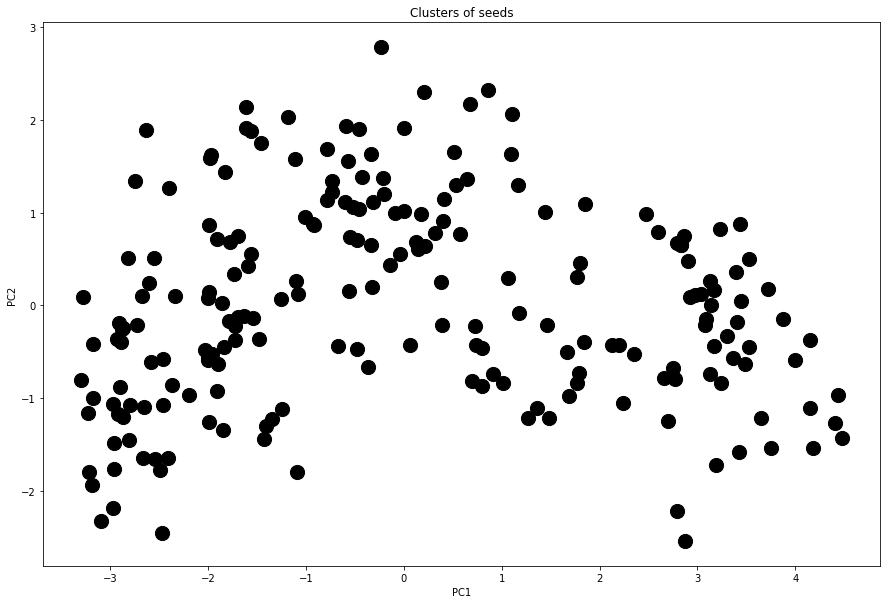

In [8]:
pca = decomposition.PCA(n_components=2)
df = StandardScaler().fit_transform(df)
pc = pca.fit_transform(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[:, 0], pc[:, 1], s = 200, c = "black")
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Для сверки с эталонным решением расскрасим по категоризирующей переменной - сорту пшеницы.

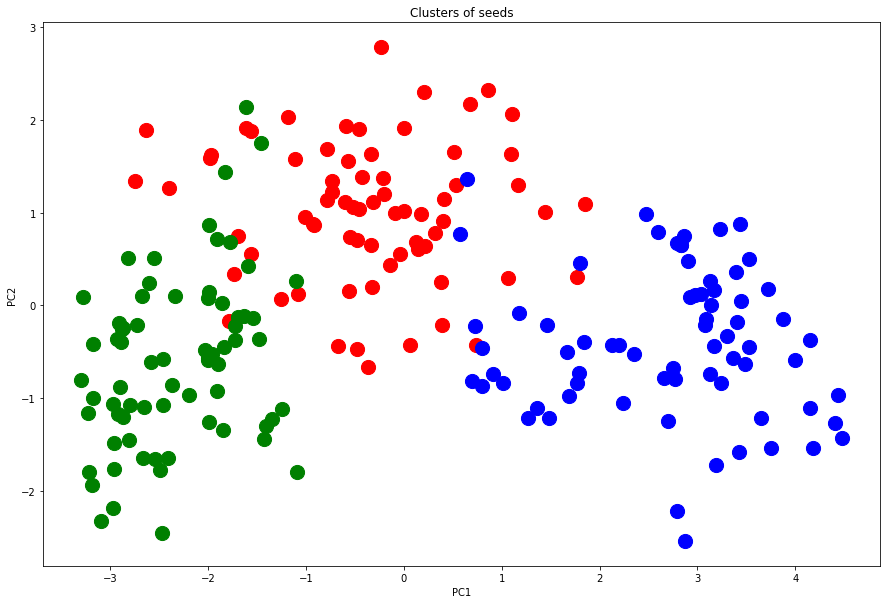

In [9]:
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[df0.Variety_of_wheat == 1, 0], pc[df0.Variety_of_wheat== 1, 1], s = 200, c = 'red')
plt.scatter(pc[df0.Variety_of_wheat == 2, 0], pc[df0.Variety_of_wheat == 2, 1], s = 200, c = 'blue')
plt.scatter(pc[df0.Variety_of_wheat == 3, 0], pc[df0.Variety_of_wheat == 3, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Метод **KMeans()** в качестве гиперпараметра **n_clusters** требует задать количество класстеров. Применим метод "локтя" для оценки их возможного количества.

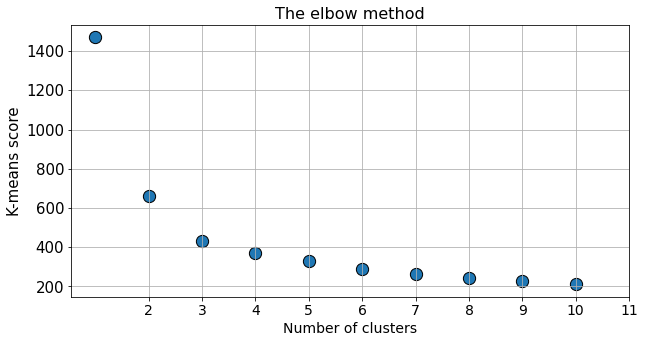

In [10]:
km_scores= []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=0).fit(df)
    preds = km.predict(df)
    km_scores.append(-km.score(df))
plt.figure(figsize=(10,5))
plt.title("The elbow method",fontsize=16)
plt.scatter(x=[i for i in range(1,11)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()    

Применим метод **KMeans()** для числа кластеров от 2 до 4. Попробуем уточнить число кластеров по величине коэффициента силуэта.

For n_clusters = 2 The average silhouette_score is : 0.466
For n_clusters = 3 The average silhouette_score is : 0.401
For n_clusters = 4 The average silhouette_score is : 0.337


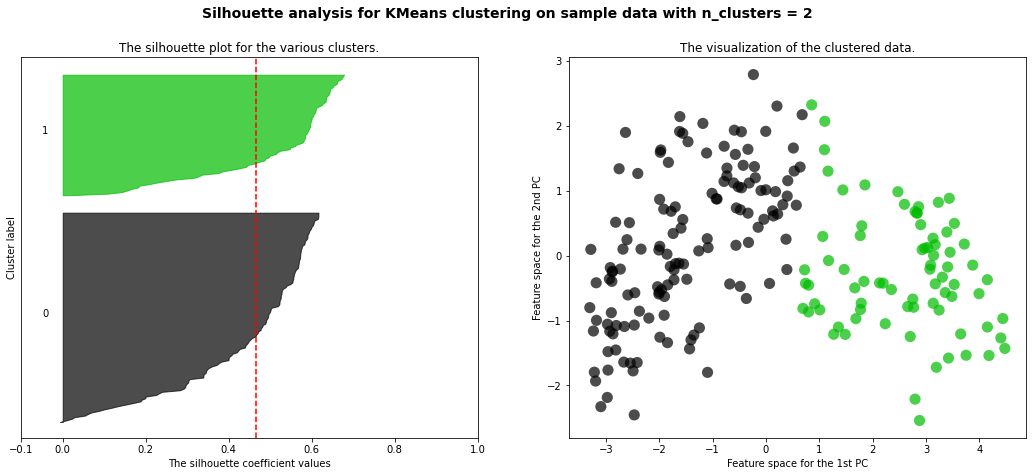

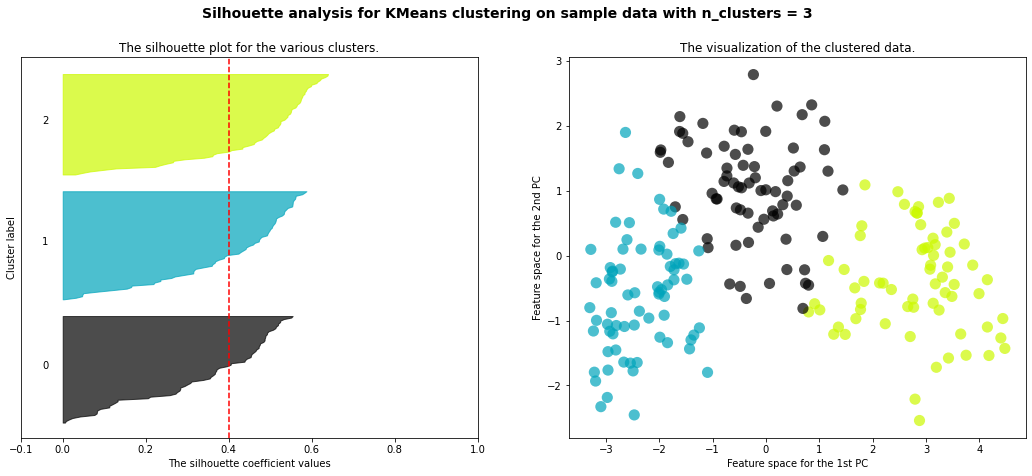

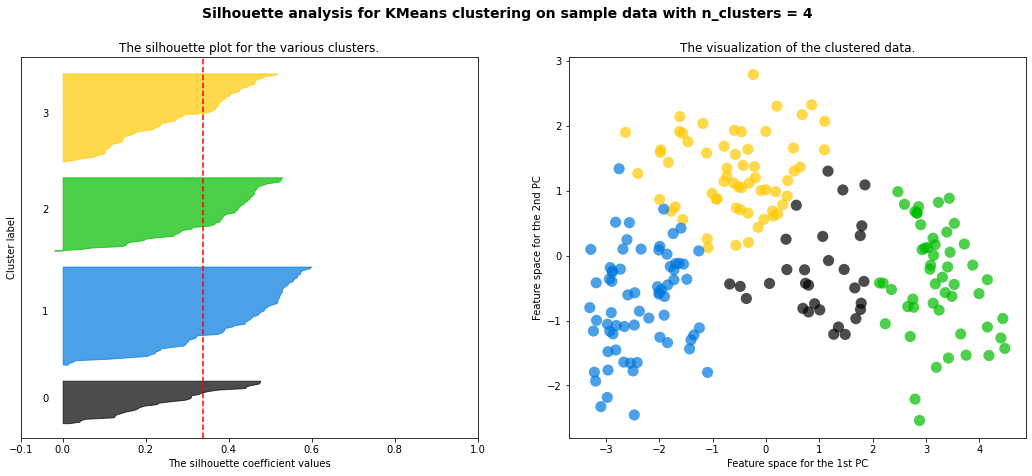

In [11]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
X, y = df, df0.Variety_of_wheat
range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is : %0.3f"
        % silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        pc[:, 0], pc[:, 1], marker=".", s=500, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st PC")
    ax2.set_ylabel("Feature space for the 2nd PC")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()

Ввиду кучности данных, коэффициенты силуэта относительно малы, максимальное значение для **n_clusters** = 2. 

Для подсчёта ошибок выполним класстеризацию с **n_clusters** = 3.

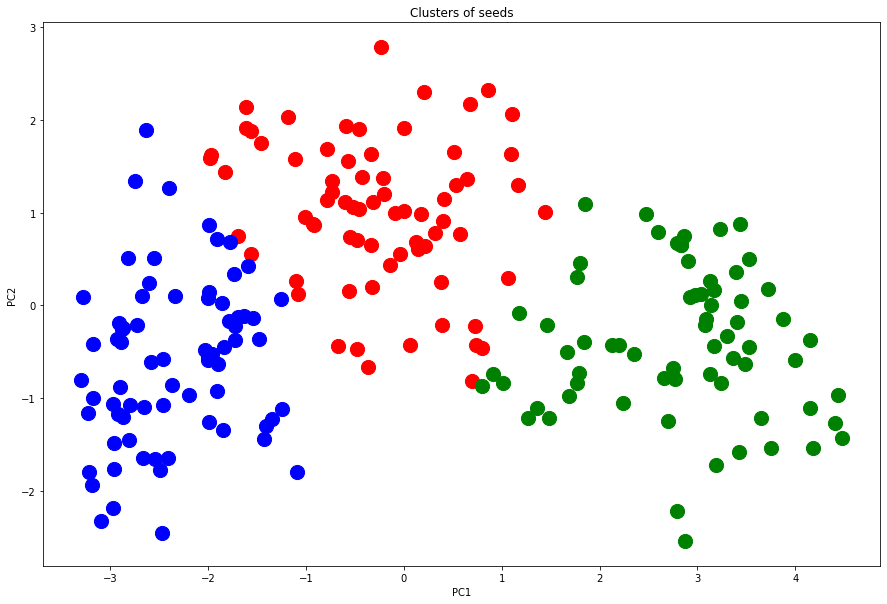

{True: 193, False: 17}

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
y_pred = kmeans.fit_predict(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[y_pred == 0, 0], pc[y_pred == 0, 1], s = 200, c = 'red')
plt.scatter(pc[y_pred == 1, 0], pc[y_pred == 1, 1], s = 200, c = 'blue')
plt.scatter(pc[y_pred == 2, 0], pc[y_pred == 2, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
y_pred[y_pred == 1] = 3
y_pred[y_pred == 0] = 1
dict(Counter(y_pred == df0.Variety_of_wheat))

KMeans $-\$ эвристический метод с плохо определённым результатом. Предложенное решение для **n_clusters** = 3 отличается от эталона.

Вычислим функционалы качества с помощью методов пакета **sklearn.metrics**.

In [13]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df, y_pred))
print("Davies Bouldin Index: %0.3f"
      % davies_bouldin_score(df, y_pred))

Silhouette Coefficient: 0.401
Davies Bouldin Index: 0.928


# Иерархическая кластеризация

Методы иерархической кластеризации основываются на двух идеях: <br>
 - агломерации (AGNES) - последовательное объединение индивидуальных объектов или их групп во все более крупные подмножества, <br>
 - разбиении (DIANA) -  начинается с корня и на каждом шаге делит образующие группы по степени их гетерогенности . <br>

Сначала нужно задать, как мы будем измерять расстояние между точками.
- Евклидово расстояние: $\rho(x,y) = \sqrt{\sum_i (x_i - y_i)^2}$.
- Расстояние городских кварталов (манхэттенское расстояние):  $\rho(x,y) = \sum_i |x_i - y_i|$.
- Расстояние Чебышёва: $\rho(x,y) = \max_i |x_i - y_i|$.

Важно исходно стандартизовать признаки.

## Алгоритм агломеративной иерархической кластеризации

1. Одноэлементые кластеры: $$C_1 = \left\{\{\pmb x_1\}, \dots, \{\pmb x_n\}\right\}; \; R_1 = 0$$ $$\forall\, i \neq j \text{ вычислить } R(\{\pmb x_i\}, \{\pmb x_j\})$$ 
2. для всех $t = 2, \dots, n$ ($t$ $-$ номер итерации) 
3. найти в $C_{t-1}$ два ближайших кластера: $$(U, V) = \arg \min_{U \neq V} R(U, V); R_t=R(U, V);$$
4. слить их в один кластер: $$W = U \cup V; \; C_t = C_{t-1} \cup W \backslash \{U, V\}$$ 
5. для всех $S \in C_t \backslash W $ 
6. вычислить расстояние $R(W, S)$ по формуле Ланса-Уильямса.

## Формула Ланса-Уильямса

Позволяет обобщить большинство способов определить расстояние между кластерами $ R(W, S),\; W = U \cup V,\, U,\, V,\, S \subset X, $ зная расстояния $ R(U, S),\, R(V, S),\, R(U, V)$: 

$$ R(W, S) = \alpha_{U} R(U, S) + \alpha_{V} R(V, S) + \beta R(U, V) + \gamma|R(U, S) − R(V, S)|, \\ где \,  \alpha_{U}, \alpha_{V} , \beta, \gamma - числовые \,параметры.$$



Отдельные версии агломеративной иерархической процедуры отличаются правилами вычисления расстояния между кластерами:<br>
- алгоритм одиночной связи, или “ближайшего соседа” (single linkage clustering) $-$ расстояние между кластерами оценивается как минимальное из дистанций между парами объектов, один из которых входит в первый кластер, а другой - во второй $$R^{\text{б}}(W, S) = \min_{\pmb w \in W, \pmb s \in S} \rho(\pmb w, \pmb s);$$ $$\alpha_U=\alpha_V=1/2,\enspace \beta=0,\enspace \gamma=-1/2;$$ 

- алгоритм полной связи или “дальнего соседа” (complete linkage clustering) - вычисляется расстояние между наиболее удаленными объектами $$R^{\text{д}}(W, S) = \max_{\pmb w \in W, \pmb s \in S} \rho(\pmb w, \pmb s);$$ $$\alpha_U=\alpha_V=1/2,\enspace \beta=0,\enspace \gamma=1/2;$$ 

- алгоритм средней связи (average linkage clustering) на каждом следующем шаге объединяет два ближайших кластера, рассчитывая среднюю арифметическую дистанцию между всеми парами объектов $$R^{\text{с}}(W, S) = \frac{1}{ |W| |S| } \sum_{\pmb w \in W} \sum_{\pmb s \in S} \rho(\pmb w, \pmb s);$$ $$\alpha_U=\frac{|U|}{|W|},\enspace \alpha_V=\frac{|V|}{|W|},\enspace \beta=\gamma=0;$$ 
    
- метод минимума дисперсии Уорда (Ward) $$ R(W, S) = \frac{|S||W|}{|S|+|W|}\rho^{2}\left(\sum\limits_{\pmb w\in W}\frac{\pmb w}{|W|}, \sum\limits_{\pmb s\in S}\frac{\pmb s}{|S|}\right); $$ $$ \alpha_U = \frac{|S|+|U|}{|S|+|W|},\, \alpha_V = \frac{|S|+|V|}{|S|+|W|},\, \beta = -\frac{|S|}{|S|+|W|},\, \gamma = 0. $$


## Визуализация кластерной структуры

> **Дендрограмма** $-$ древовидный график расстояний, при которых произошло слияние кластеров на каждом шаге 

- По вертикальной оси откладывается расстояние $R_t$
- Кластеры группируются вдоль горизонтальной оси
- После построения дерева можно его разрезать на поддеревья по заданному расстоянию между кластерами и получить сами кластеры.

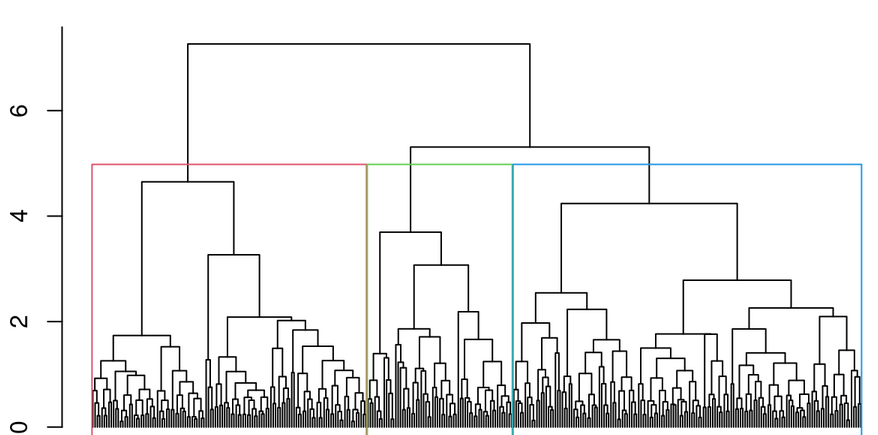

In [14]:
from IPython.display import Image
Image(filename="resources/dendro.png", width=800)

## Результы кластеризации для разных правил вычисления расстояния между кластерами

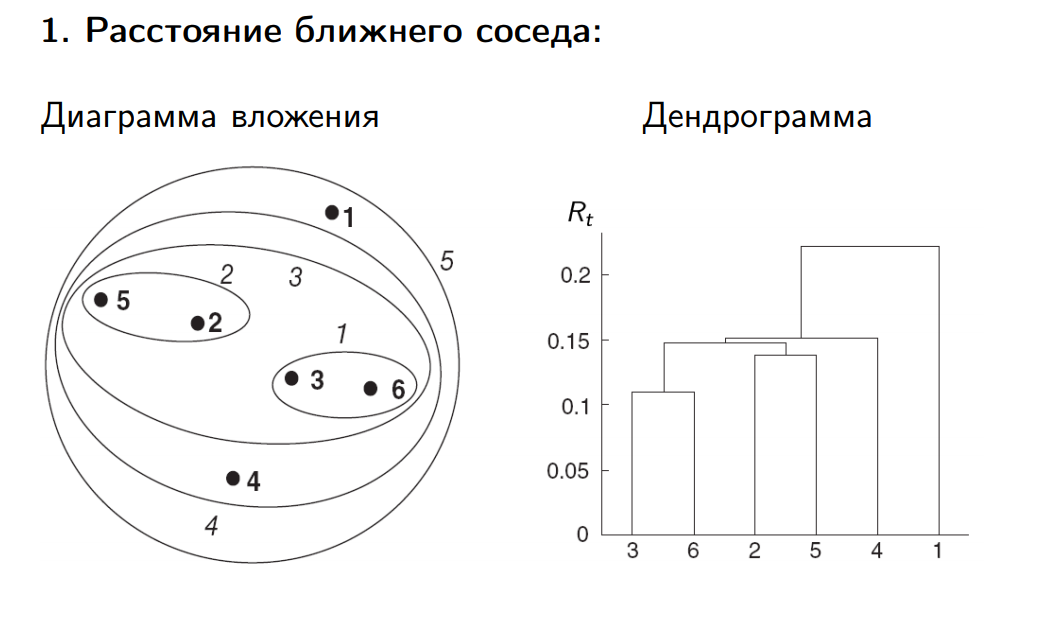

In [15]:
Image(filename="resources/near.png", width=800)

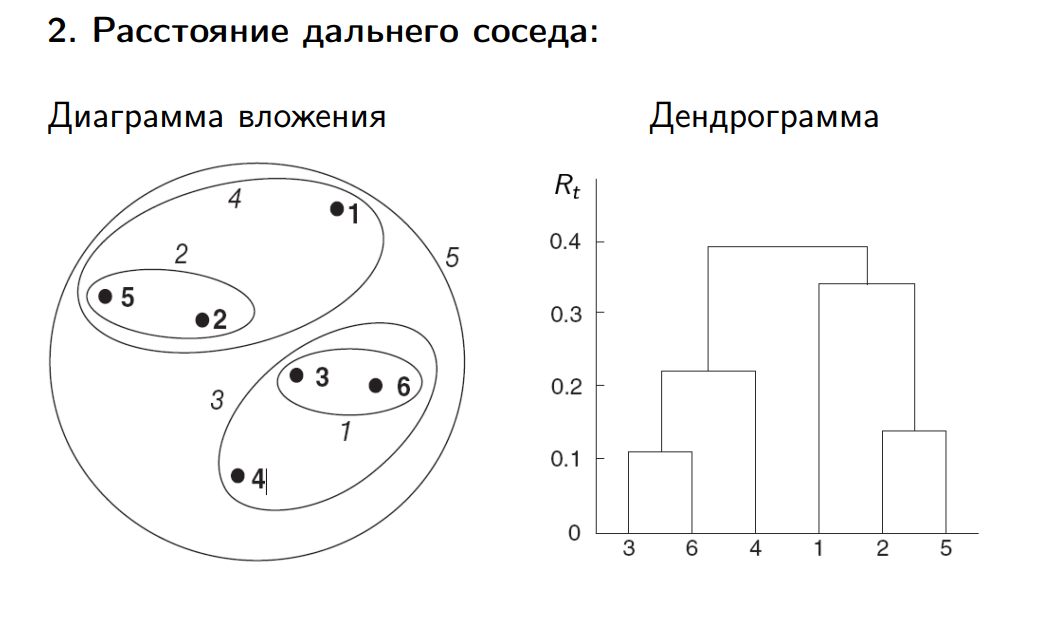

In [16]:
Image(filename="resources/comp.png", width=800)

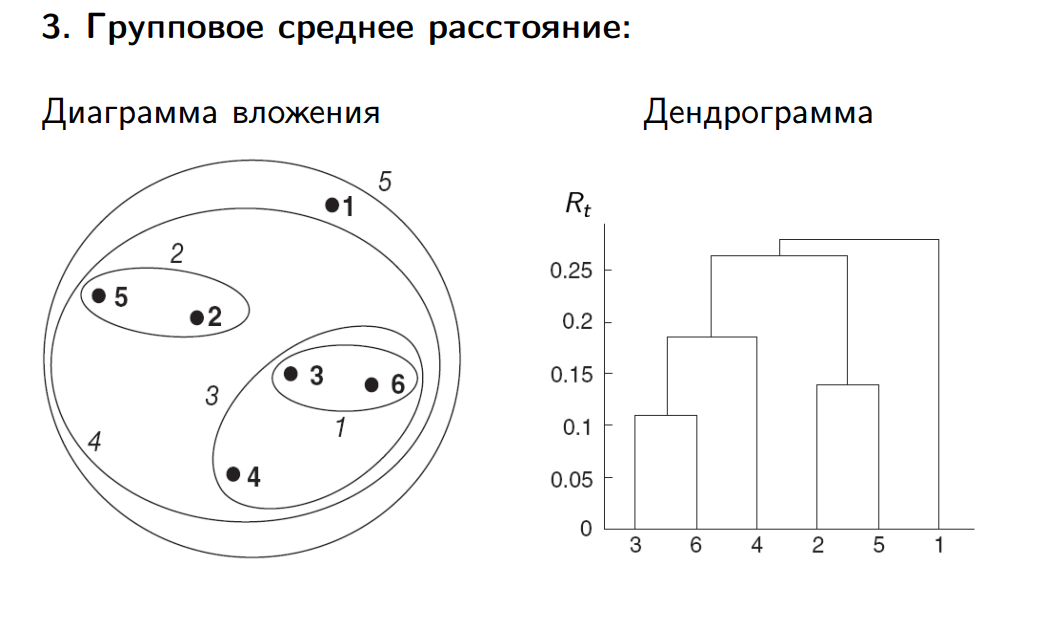

In [17]:
Image(filename="resources/mean.png", width=800)

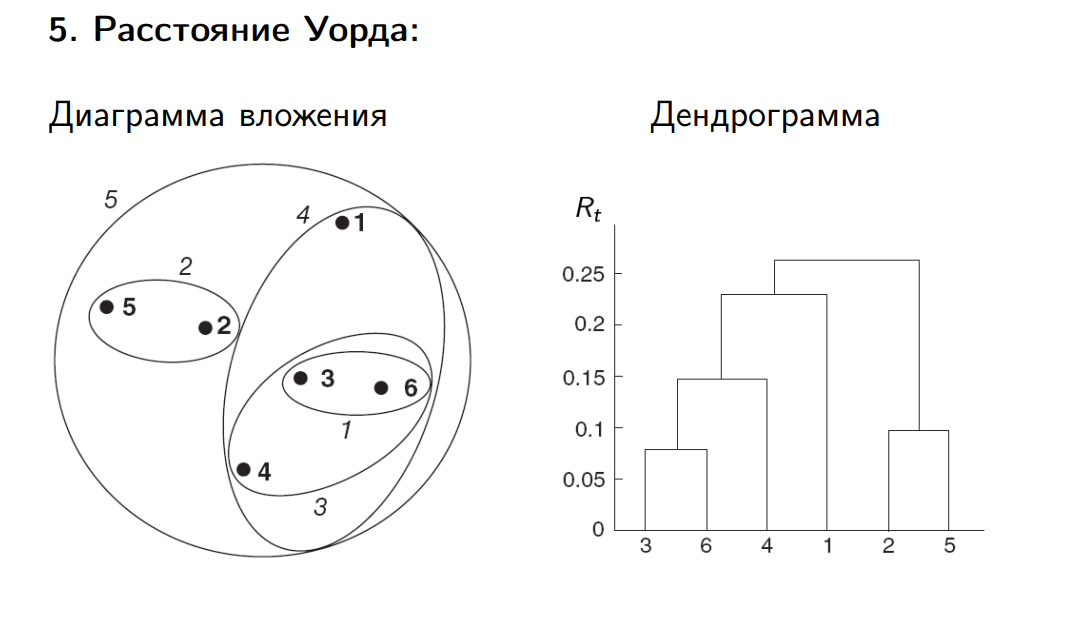

In [18]:
Image(filename="resources/ward.png", width=800)

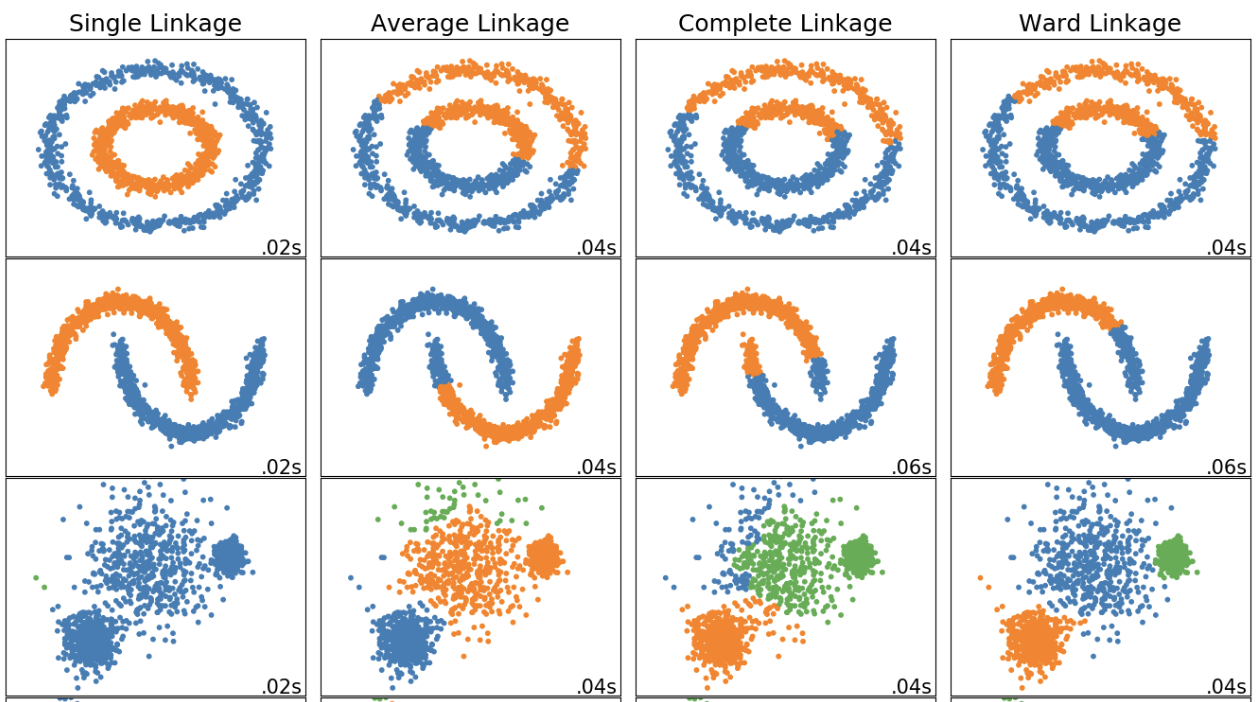

In [11]:
Image(filename="resources/metrics.png")

## Плюсы и минусы
**Достоинства:**
- В качестве результата можно получить дендрограмму.
- Форма кластеров может быть произвольной.
- Количество кластеров можно определить по дендрограмме.

**Недостатки:**
- Необходимость подбирать одно из множества различных расстояний.
- Отсутствие модели в задаче не позволяет однозначно предпочесть одно разделение на кластеры другому.

## Применение к нашим данным

Применим метод иерархической кластеризации объединения кластеров с алгоритмом средней связи.

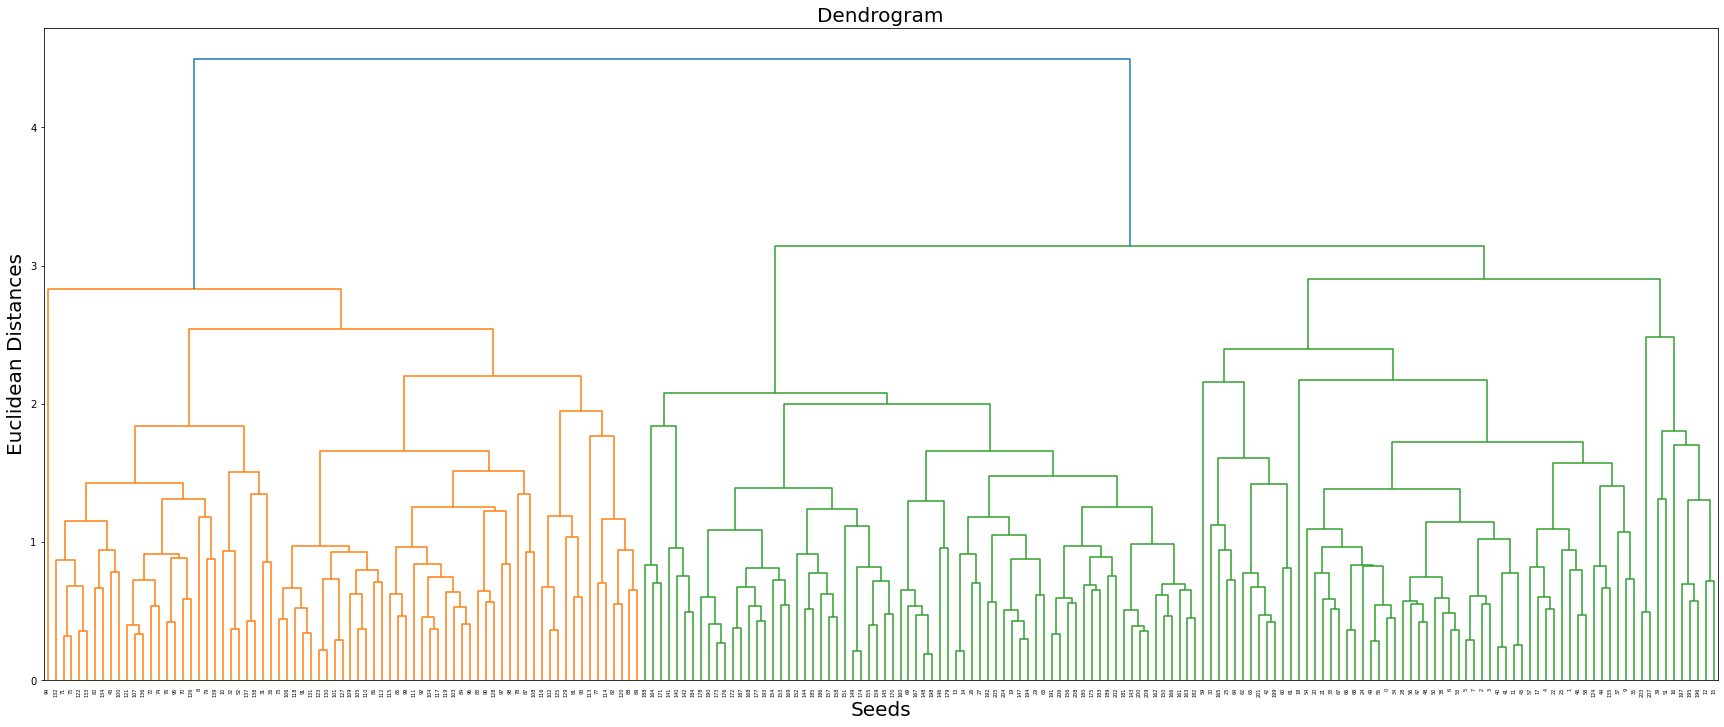

In [14]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize = (30,12)) 
fig.add_subplot()
dendrogram = sch.dendrogram(sch.linkage(df, method = 'average'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Seeds', fontsize = 20)
plt.ylabel('Euclidean Distances', fontsize = 20)
plt.show() 

Воспользуемся методом **AgglomerativeClustering()** из пакета **sklearn.cluster**. Зададим число кластеров **n_clusters** равное трём, эвклидово расстояние в качестве метрики вычисления расстояния **affinity**,  а также явно укажем правило вычисления расстояния между кластерами **linkage** $-$ алгоритм средней связи. Значения остальных гиперпараметров оставим по умолчанию. 

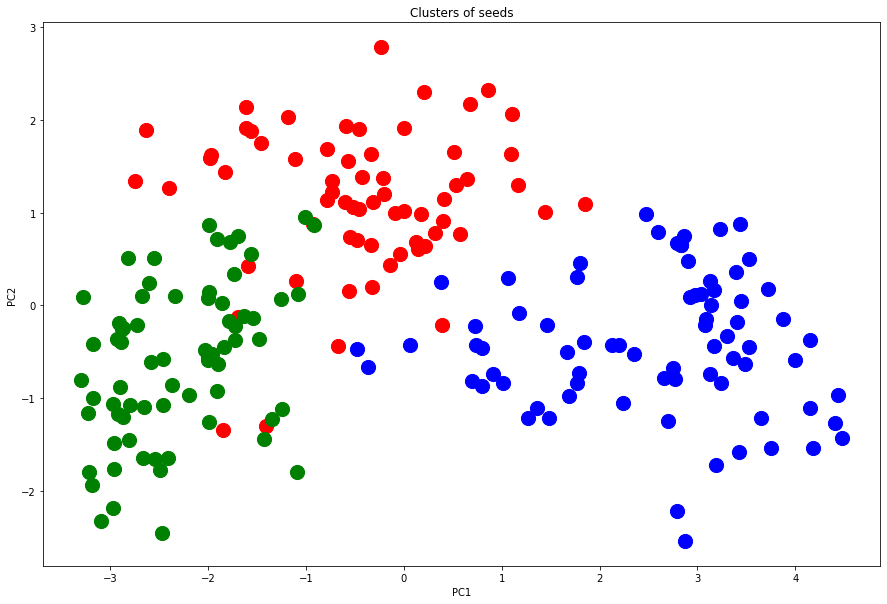

{True: 185, False: 25}

In [29]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_pred = model.fit_predict(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[y_pred == 0, 0], pc[y_pred == 0, 1], s = 200, c = 'red')
plt.scatter(pc[y_pred == 1, 0], pc[y_pred == 1, 1], s = 200, c = 'blue')
plt.scatter(pc[y_pred == 2, 0], pc[y_pred == 2, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
dict(Counter(y_pred == df0.Variety_of_wheat-1))

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df, y_pred))
print("Davies Bouldin Index: %0.3f"
      % davies_bouldin_score(df, y_pred))

Silhouette Coefficient: 0.376
Davies Bouldin Index: 0.983


Повторим c алгоритмом “дальнего соседа”.

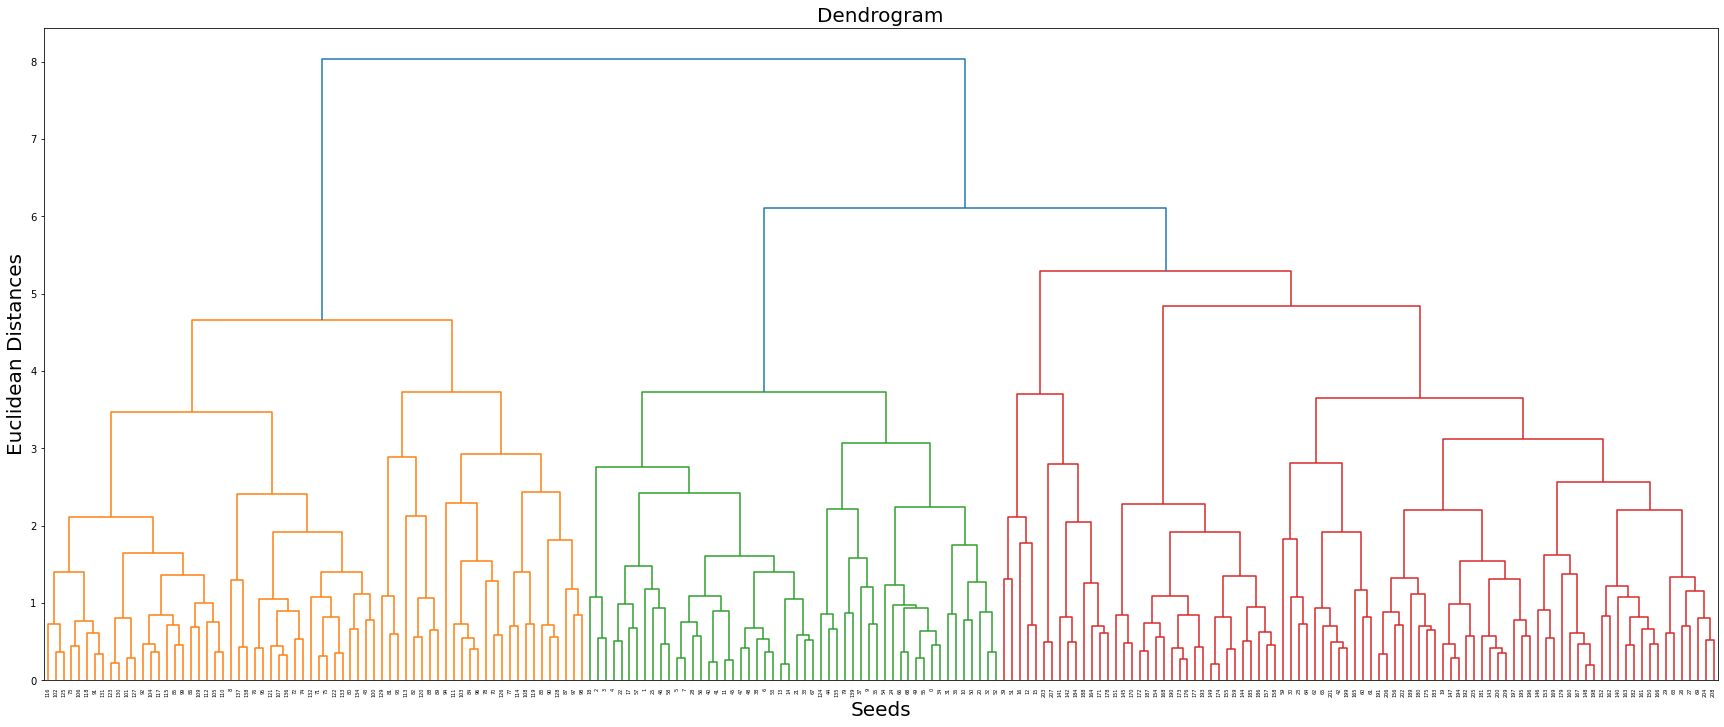

In [17]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize = (30,12)) 
fig.add_subplot()
dendrogram = sch.dendrogram(sch.linkage(df, method = 'complete'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Seeds', fontsize = 20)
plt.ylabel('Euclidean Distances', fontsize = 20)
plt.show()

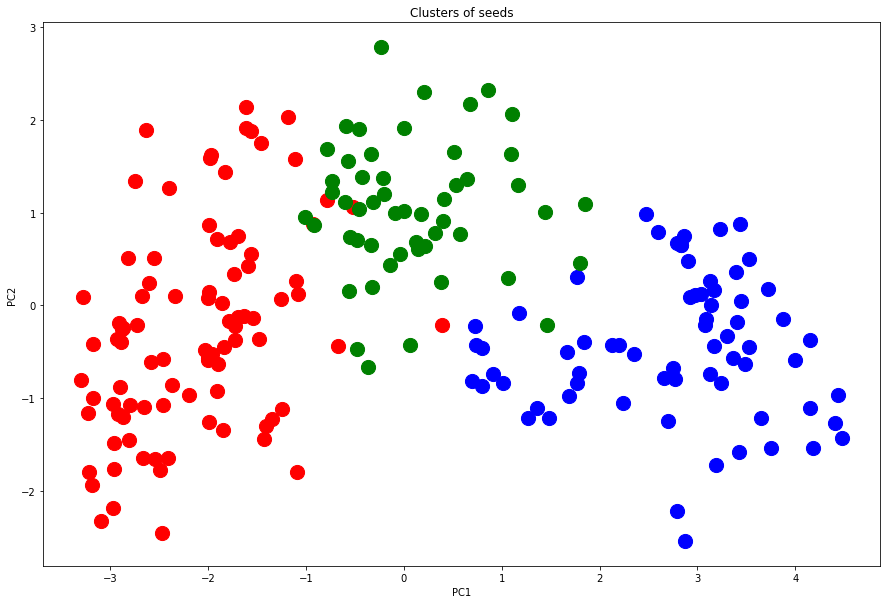

{True: 184, False: 26}

In [18]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_pred = model.fit_predict(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[y_pred == 0, 0], pc[y_pred == 0, 1], s = 200, c = 'red')
plt.scatter(pc[y_pred == 1, 0], pc[y_pred == 1, 1], s = 200, c = 'blue')
plt.scatter(pc[y_pred == 2, 0], pc[y_pred == 2, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
y_pred[y_pred == 0] = 3
y_pred[y_pred == 2] = 0
y_pred[y_pred == 3] = 2
dict(Counter(y_pred == df0.Variety_of_wheat-1))

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df, y_pred))
print("Davies Bouldin Index: %0.3f"
      % davies_bouldin_score(df, y_pred))

Silhouette Coefficient: 0.350
Davies Bouldin Index: 0.957


Сравним с методом минимума дисперсии Уорда.

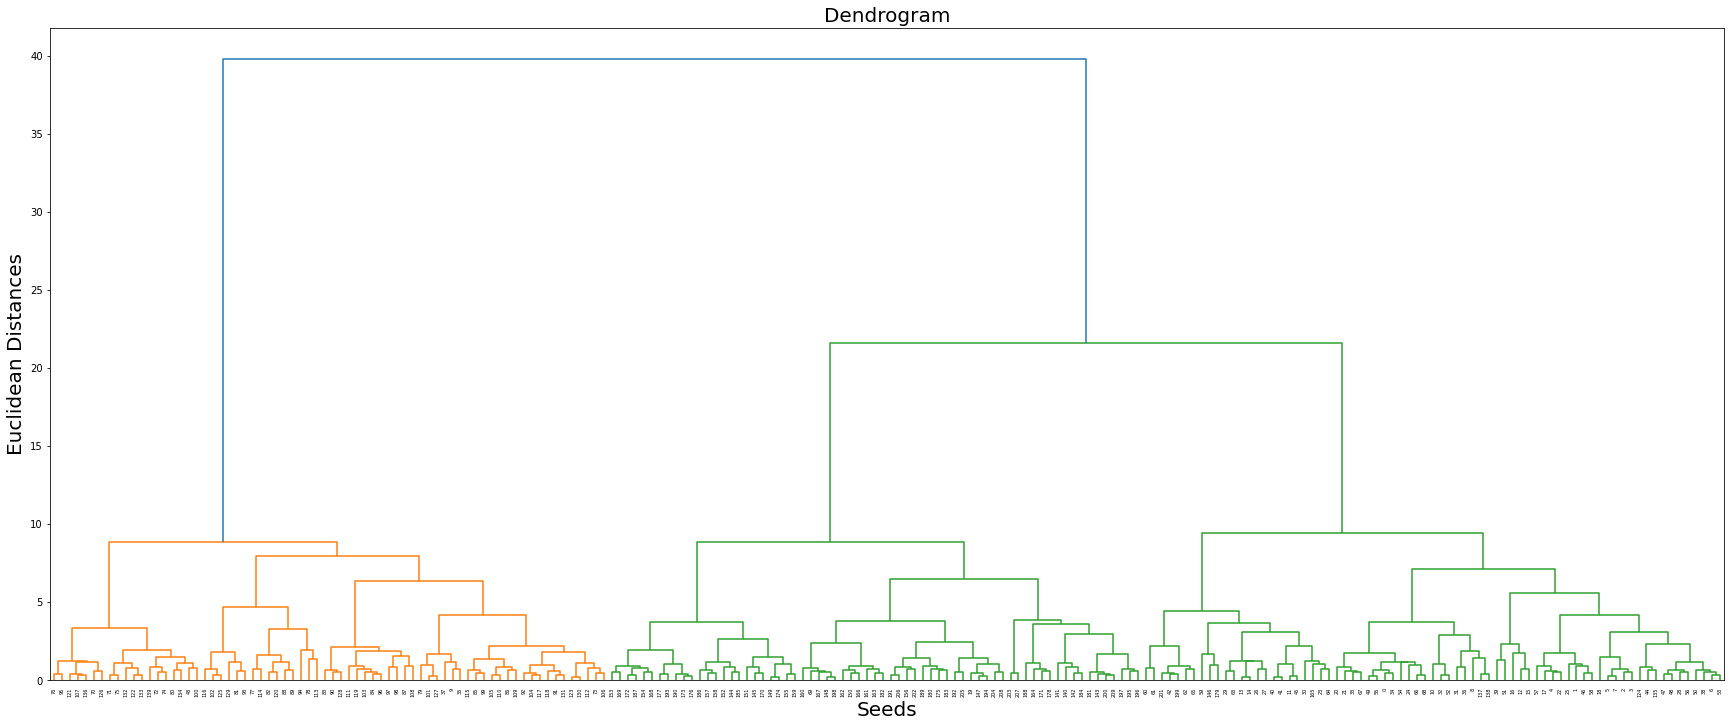

In [20]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize = (30,12)) 
fig.add_subplot()
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Seeds', fontsize = 20)
plt.ylabel('Euclidean Distances', fontsize = 20)
plt.show()

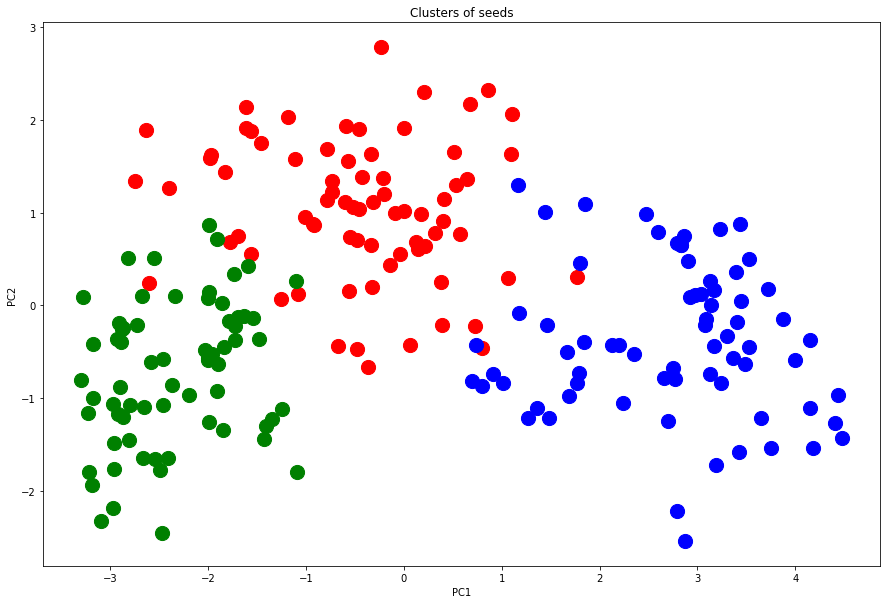

{True: 195, False: 15}

In [21]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred = model.fit_predict(df)
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[y_pred == 0, 0], pc[y_pred == 0, 1], s = 200, c = 'red')
plt.scatter(pc[y_pred == 1, 0], pc[y_pred == 1, 1], s = 200, c = 'blue')
plt.scatter(pc[y_pred == 2, 0], pc[y_pred == 2, 1], s = 200, c = 'green')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
dict(Counter(y_pred == df0.Variety_of_wheat-1))

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df, y_pred))
print("Davies Bouldin Index: %0.3f"
      % davies_bouldin_score(df, y_pred))

Silhouette Coefficient: 0.393
Davies Bouldin Index: 0.945


Для метода Уорда получили максимальный коэффициент силуэта и минимальный индекс Дэвиса-Болдина, что согласуется к оптимальным количеством ошибок.

# Алгоритм DBSCAN (Density-Based Spatial Clustering of Aplications with Noise)

Объект $\pmb x \in U$, его $\varepsilon$-окрестность $U_\varepsilon (\pmb x) = \{\pmb u \in U : \rho(\pmb x , \pmb u ) \leq \varepsilon\}$

Каждый объект может быть одного из трёх типов:
- корневой: имеет плотную окрестность $|U_\varepsilon (\pmb x)| \geq m$ 
- граничный: не корневой, но находится в окрестности корневого 
- выброс: не корневой и не граничный. 

### Иллюстрация к алгоритму DBSCAN.

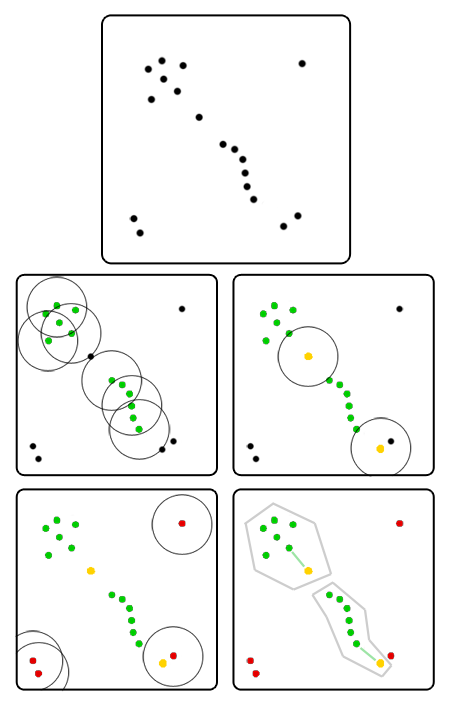

In [12]:
Image(filename="resources/dbscan.png", width=600)

На рисунках зелёным отмечены корневые объекты, жёлтым — граничные и красным — шумовые.

## Алгоритм DBSCAN

**Вход:** Выборка $\pmb X^{n} = \{\pmb x_1, \dots, \pmb x_{n}\}$, параметры $\varepsilon$ и $m$;

**Выход:** разбиение выборки на кластеры и шумовые выбросы;

1. $U=X^n$, $a=0$; 
2. **Пока** есть некластеризованные точки, т.е. $U \neq \varnothing$; 
3. &emsp; взять случайную точку $\pmb x \in U$; 
4. &emsp; **если** $|U_\varepsilon (\pmb x)| < m$, **то** 
5. &emsp; &emsp; пометить $\pmb x$ как шумовой; 
6. &emsp; **иначе** 
7. &emsp; &emsp; создать новый кластер: $K=U_\varepsilon (\pmb x)$; $a = a + 1$; 
8. &emsp; &emsp; **для всех** $\pmb x' \in K$ 
9. &emsp; &emsp; &emsp; **если** $|U_\varepsilon (\pmb x')| \geq m$ **то** $K=K \cup U_\varepsilon(\pmb x')$; 
10. &emsp; &emsp; &emsp;  **иначе** пометить $\pmb x'$ как граничный элемент $K$; 
19. &emsp; &emsp; соотнести объект классу $a$ для всех $\pmb x' \in K$; 
20. &emsp; &emsp; $U=U \setminus K$; 

### Пример работы

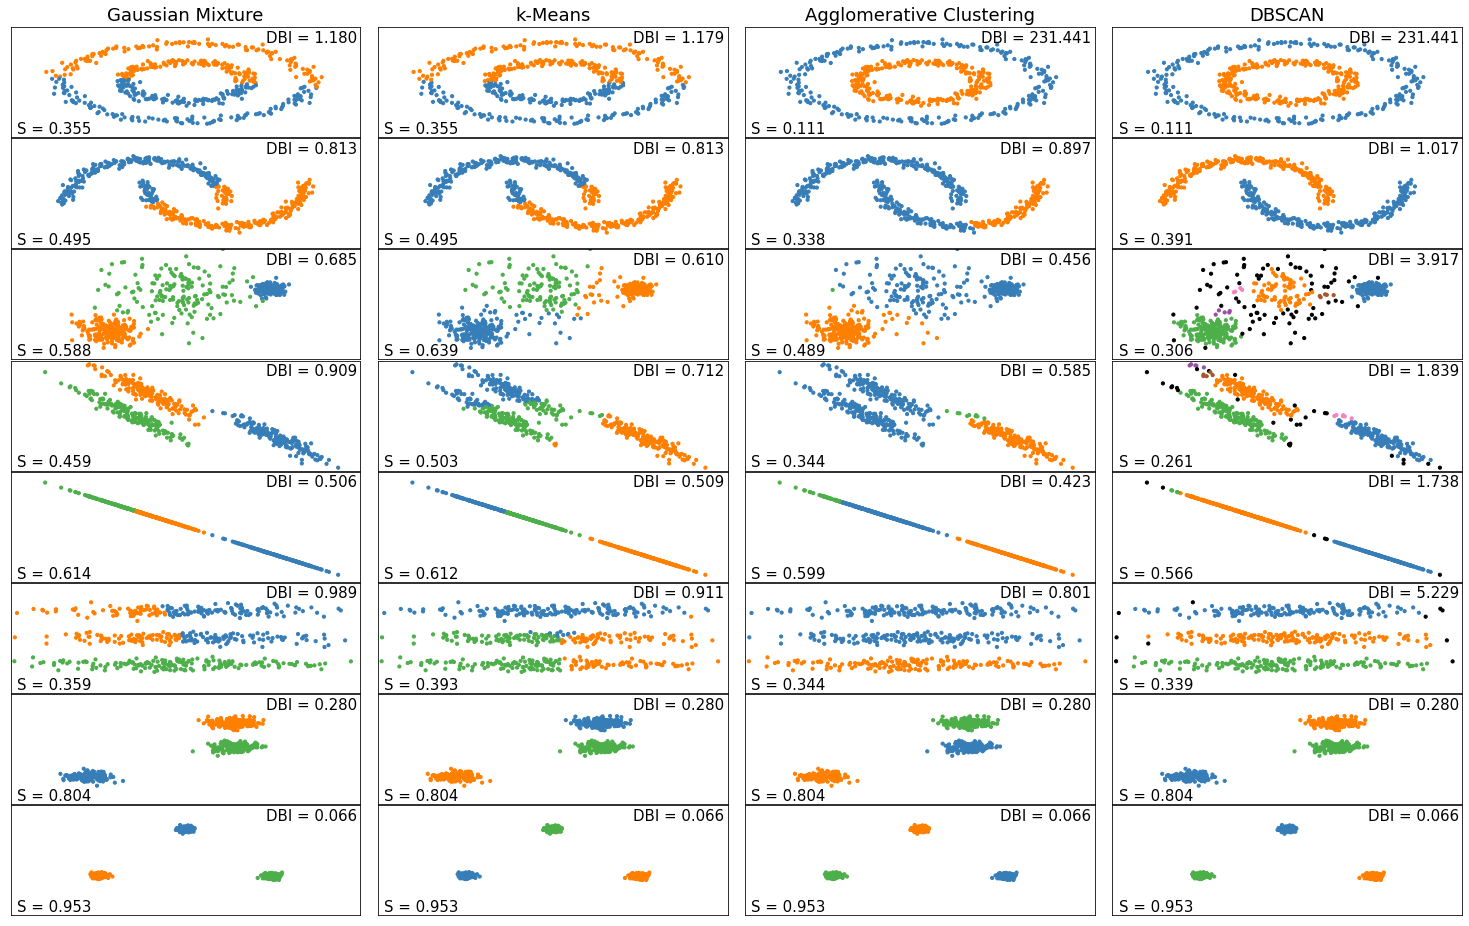

Алгоритм Датасет Силуэт      DBI
1           Gaussian Mixture       0  0.355     1.18
2                    k-Means       0  0.355    1.179
3   Agglomerative Clustering       0  0.111  231.441
4                     DBSCAN       0  0.111  231.441
5           Gaussian Mixture       1  0.495    0.813
6                    k-Means       1  0.495    0.813
7   Agglomerative Clustering       1  0.338    0.897
8                     DBSCAN       1  0.391    1.017
9           Gaussian Mixture       2  0.588    0.685
10                   k-Means       2  0.639     0.61
11  Agglomerative Clustering       2  0.489    0.456
12                    DBSCAN       2  0.306    3.917
13          Gaussian Mixture       3  0.459    0.909
14                   k-Means       3  0.503    0.712
15  Agglomerative Clustering       3  0.344    0.585
16                    DBSCAN       3  0.261    1.839
17          Gaussian Mixture       4  0.614    0.506
18                   k-Means       4  0.612    0.509
19  Agglomerative Clustering       4  0.599    0.423
20                    DBSCAN       4  0.566    1.738
21          Gaussian Mixture       5  0.359    0.989
22                   k-Means       5  0.393    0.911
23  Agglomerative Clustering       5  0.344    0.801
24                    DBSCAN       5  0.339    5.229
25          Gaussian Mixture       6  0.804     0.28
26                   k-Means       6  0.804     0.28
27  Agglomerative Clustering       6  0.804     0.28
28                    DBSCAN       6  0.804     0.28
29          Gaussian Mixture       7  0.953    0.066
30                   k-Means       7  0.953    0.066
31  Agglomerative Clustering       7  0.953    0.066
32                    DBSCAN       7  0.953    0.066

In [8]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import pandas as pd
from sklearn import metrics


arr = np.array([[None, None, None, None]])

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

blob_centers = np.array(
[[-6, -6],
[6 , -6],
[0, 3]])
blob_std = np.array([0.3, 0.3, 0.3])
blobs2 = datasets.make_blobs(n_samples=n_samples, centers=blob_centers,
cluster_std=blob_std, random_state=7)

blob_centers = np.array(
[[0, -8],
[0 , 0],
[0, 8]])
blob_std = np.array([1, 1, 1])
blobs3 = datasets.make_blobs(n_samples=n_samples, centers=blob_centers,
cluster_std=blob_std, random_state=7)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
transformation2 = [[0.6, -0.6], [-0.4, 0.4]]

X_aniso = np.dot(X, transformation)
X_aniso2 = np.dot(X, transformation2)
aniso = (X_aniso, y)
aniso2 = (X_aniso2, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
     (
        aniso2,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs3, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (blobs2, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    k_means = cluster.KMeans(n_clusters=params["n_clusters"])
    dbscan = cluster.DBSCAN(eps=params["eps"])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("Gaussian Mixture", gmm),
        ("k-Means", k_means),
        ("Agglomerative Clustering", average_linkage),
        ("DBSCAN", dbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        
        arr = np.append(arr,[[name,
                              i_dataset,
                              round(metrics.silhouette_score(X, y_pred), 3),
                              round(metrics.davies_bouldin_score(X, y_pred),3)]], axis = 0)                             

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.23,
            0.03,
            ("S = %0.3f" % metrics.silhouette_score(X, y_pred)),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plt.text(
            0.99,
            0.86,
            ("DBI = %0.3f" % metrics.davies_bouldin_score(X, y_pred)),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()
df = pd.DataFrame(arr, columns=['Алгоритм', 'Датасет', 'Силуэт', 'DBI'])
df = df.drop(0)
display(df)

## Плюсы и минусы
### Достоинства: 
- Относительно быстрая кластеризация больших данных (от $O(n \ln n)$ до $O(n^2)$ в зависимости от реализации); 
- Кластеры произвольной формы (в том числе протяжённые ленты, концентрические гиперсферы); 
- Явная разметка шумовых объектов; 
- Cам определяет количество кластеров (по модулю задания других гиперпараметров);
- Хорошо поддаётся модифицированию (существуют реализации, скрещенные с k-means, например). 

### Недостатки: 
- Алгоритм может неадекватно обрабатывать сильные вариации плотности данных внутри кластера, проёмы и шумовые мосты между кластерами.
То есть метод не способен соединять кластеры через проёмы, и, наоборот, связывает явно различные кластеры через плотно населённые перемычки. Проблема особенно актуальна для данных большой размерности, так как чем больше $p$, тем больше мест, где могут случайно возникнуть проёмы или мосты. 

### Применение к нашему датасету

Воспользуемся методом **DBSCAN()** из пакета **sklearn.cluster**. Зададим границу $\varepsilon$-окрестности **eps** равной 0.64. Чем больше **eps**, тем больше получатся кластеры, и тем меньше их будет. Так же необходимо указать количество выборок (или общий вес) в окрестности точки, которую следует рассматривать как корневую точку $-$ **min_samples**. Обычно используются значения от 3 до 10. Чем более неоднородный ожидается датасет, и чем больше уровень шума, тем большим следует взять **min_samples**. Значения остальных гиперпараметров оставим по умолчанию. 

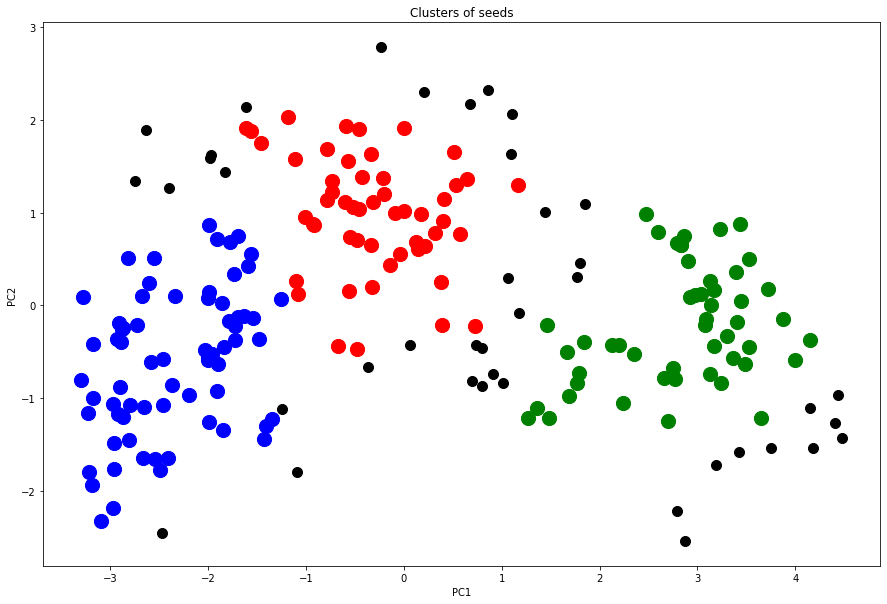

{True: 160, False: 50}

In [35]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.64, min_samples=10).fit(pc)
labels = db.labels_
fig = plt.figure(figsize = (15,10)) 
fig.add_subplot()
plt.scatter(pc[labels == 0, 0], pc[labels == 0, 1], s = 200, c = 'red')
plt.scatter(pc[labels == 1, 0], pc[labels == 1, 1], s = 200, c = 'blue')
plt.scatter(pc[labels == 2, 0], pc[labels == 2, 1], s = 200, c = 'green')
plt.scatter(pc[labels == -1, 0], pc[labels == -1, 1], s = 100, c = 'black')
plt.title('Clusters of seeds')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
labels[labels == 1] = 3
labels[labels == 0] = 1
dict(Counter(labels == df0.Variety_of_wheat))

In [36]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(df, labels))
print("Davies Bouldin Index: %0.3f"
      % davies_bouldin_score(df, labels))

Silhouette Coefficient: 0.280
Davies Bouldin Index: 1.925


## Что рассмотрим на следующей паре?

- **Тематическое моделирование**